In [1]:
#Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt, seaborn as sns

from sklearn.model_selection import train_test_split              

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn import linear_model, metrics

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV,cross_val_score

from sklearn.metrics import r2_score

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',300)


import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading  the data into the dataframe
data=pd.read_csv('train.csv')

In [3]:
#Reading the data top 5 rows
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Inspecting the data
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#Inspecting the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Observations:
- Null Values are present in Data Frame. And TYpe of the Feature are proper

In [6]:
#Inspecting the data
data.shape

(1460, 81)

### Observations:
- There are 1460 records and 81 Features 

In [7]:
#Checking missing values
(data.isnull().sum()/len(data))*100 

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

### Observations:
- There are some features which has more than 50 % missing value.
- There are also some features having less percentage of mmissing

## Imputing Missing Values

In [8]:
#missing values more than 45%
l=['PoolQC','Fence','MiscFeature','FireplaceQu','Alley']

In [9]:
for column in l:
    print(column+"==>",(data[column].isnull().sum()/len(data))*100 )

PoolQC==> 99.52054794520548
Fence==> 80.75342465753424
MiscFeature==> 96.30136986301369
FireplaceQu==> 47.26027397260274
Alley==> 93.76712328767123


In [10]:
#dropping the columns with high percentage missing values
data=data.drop(l,axis=1)

In [11]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [12]:
#Inspecting the shape of dataframe
data.shape

(1460, 76)

### Observations:
- After Dropping there are 76 features

In [13]:
data_miss=round((data.isnull().sum()/len(data))*100,2)

In [14]:
data_miss=pd.DataFrame(data_miss)
data_miss.columns=['Missing_percentage']

In [15]:
data_miss[data_miss['Missing_percentage']>0.00]

,Missing_percentage
LotFrontage,17.74
MasVnrType,0.55
MasVnrArea,0.55
BsmtQual,2.53
BsmtCond,2.53
BsmtExposure,2.60
BsmtFinType1,2.53
BsmtFinType2,2.60
Electrical,0.07
GarageType,5.55


### Observations:
- Features having missing value

In [16]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

### LotFrontage 
- LotFrontage: Linear feet of street connected to property


In [17]:
#missing value
data.LotFrontage.isnull().sum()

259

In [18]:
data.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [19]:
# for LotFrontage 50th percentile: 70 aprrox
data['LotFrontage'].fillna(70,inplace=True)

In [20]:
data.LotFrontage.isnull().sum()

0

In [21]:
data.LotFrontage.describe()

count    1460.000000
mean       70.041096
std        22.024031
min        21.000000
25%        60.000000
50%        70.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

## MasVnrType
- MasVnrType: Masonry veneer type

In [22]:
#missing Value
data['MasVnrType'].isnull().sum()

8

In [23]:
data['MasVnrType'].value_counts(normalize=True)

None       0.595041
BrkFace    0.306474
Stone      0.088154
BrkCmn     0.010331
Name: MasVnrType, dtype: float64

In [24]:
#most of the values are 0
data['MasVnrType'].mode()[0]

'None'

In [25]:
#filling null values with mode
data['MasVnrType'].fillna(data['MasVnrType'].mode()[0],inplace=True)

In [26]:
#Verifying the null vlaues in column
data['MasVnrType'].isnull().sum()

0

In [27]:
data['MasVnrType'].value_counts(normalize=True)

None       0.597260
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
Name: MasVnrType, dtype: float64

## MasVnrArea
- MasVnrArea: Masonry veneer area in square feet

In [28]:
#missing value
data['MasVnrArea'].isnull().sum()

8

In [29]:
data['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [30]:
#Checking the percentile
data['MasVnrArea'].quantile([0.1,0.5,0.8,0.9])

0.1      0.0
0.5      0.0
0.8    206.0
0.9    335.0
Name: MasVnrArea, dtype: float64

In [31]:
#Filling null values with median or 50th percentile value tha is 0
data['MasVnrArea'].fillna(0,inplace=True)

In [32]:
#Verifying the null vlaues in column
data['MasVnrArea'].isnull().sum()

0

## BsmtQual
- BsmtQual: Evaluates the height of the basement
       Ex       Excellent (100+ inches) 
       Gd       Good (90-99 inches)
       TA       Typical (80-89 inches)
       Fa       Fair (70-79 inches)
       Po       Poor (<70 inches
       NA       No Basement


In [33]:
#missing value
data['BsmtQual'].isnull().sum()

37

In [34]:
data['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [35]:
# As mentioned in data these null values mean No Basemnt. Filling them with 'No Basement'
data['BsmtQual'].fillna('No Basement',inplace=True)

In [36]:
#Verifying the null vlaues in column
data['BsmtQual'].isnull().sum()

0

In [37]:
data['BsmtQual'].value_counts()

TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64

## BsmtCond
- BsmtCond: Evaluates the general condition of the basement
       Ex       Excellent
       Gd       Good
       TA       Typical - slight dampness allowed
       Fa       Fair - dampness or some cracking or settling
       Po       Poor - Severe cracking, settling, or wetness
       NA       No Basement


In [38]:
#Missing Value
data['BsmtCond'].isnull().sum()

37

In [39]:
# As mentioned in data these null values mean No Basemnt. Filling them with 'No Basement'
data['BsmtCond'].fillna('No Basement',inplace=True)

In [40]:
#Verifying the null vlaues in column
data['BsmtCond'].isnull().sum()

0

In [41]:
data['BsmtCond'].value_counts()

TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64

## BsmtExposure
- BsmtExposure: Refers to walkout or garden level walls
       Gd       Good Exposure
       Av       Average Exposure (split levels or foyers typically score average or above)      
       Mn       Mimimum Exposure
       No       No Exposure
       NA       No Basement

In [42]:
#Missing Value
data['BsmtExposure'].isnull().sum()

38

In [43]:
# As mentioned in data these null values mean No Basemnt. Filling them with 'No Basement'
data['BsmtExposure'].fillna('No Basement',inplace=True)

In [44]:
#Verifying the null vlaues in column
data['BsmtExposure'].isnull().sum()

0

In [45]:
data['BsmtExposure'].value_counts()

No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64

## BsmtFinType1
- BsmtFinType1: Rating of basement finished area
       GLQ      Good Living Quarters
       ALQ      Average Living Quarters
       BLQ      Below Average Living Quarters   
       Rec      Average Rec Room
       LwQ      Low Quality
       Unf      Unfinshed
       NA       No Basement


In [46]:
#Missing Value
data['BsmtFinType1'].isnull().sum()

37

In [47]:
# As mentioned in data these null values mean No Basemnt. Filling them with 'No Basement'
data['BsmtFinType1'].fillna('No Basement',inplace=True)

In [48]:
#Verifying the null vlaues in column
data['BsmtFinType1'].isnull().sum()

0

In [49]:
data['BsmtExposure'].value_counts()

No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64

## BsmtFinType2
- BsmtFinType2: Rating of basement finished area (if multiple types)
       GLQ      Good Living Quarters
       ALQ      Average Living Quarters
       BLQ      Below Average Living Quarters   
       Rec      Average Rec Room
       LwQ      Low Quality
       Unf      Unfinshed
       NA       No Basement


In [50]:
#Missing Value
data['BsmtFinType2'].isnull().sum()

38

In [51]:
# As mentioned in data these null values mean No Basemnt. Filling them with 'No Basement'
data['BsmtFinType2'].fillna('No Basement',inplace=True)

In [52]:
#Verifying the null vlaues in column
data['BsmtFinType2'].isnull().sum()

0

In [53]:
data['BsmtFinType2'].value_counts()

Unf            1256
Rec              54
LwQ              46
No Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

## GarageType
- GarageType: Garage location
                
       2Types   More than one type of garage
       Attchd   Attached to home
       Basment  Basement Garage
       BuiltIn  Built-In (Garage part of house - typically has room above garage)
       CarPort  Car Port
       Detchd   Detached from home
       NA       No Garage


In [54]:
#Missing Value
data['GarageType'].isnull().sum()

81

In [55]:
# As mentioned in data these null values mean No Basemnt. Filling them with 'No Garage'
data['GarageType'].fillna('No Garage',inplace=True)

In [56]:
#Verifying the null vlaues in column
data['GarageType'].isnull().sum()

0

In [57]:
data['GarageType'].value_counts(normalize=True)

Attchd       0.595890
Detchd       0.265068
BuiltIn      0.060274
No Garage    0.055479
Basment      0.013014
CarPort      0.006164
2Types       0.004110
Name: GarageType, dtype: float64

## GarageYrBlt
- GarageYrBlt: Year garage was built

In [58]:
#Missing Value
data['GarageYrBlt'].isnull().sum()

81

In [59]:
# As mentioned in data these null values mean No Basemnt. Filling them with 'No Garage'
data['GarageYrBlt'].fillna('No Garage',inplace=True)

In [60]:
#Verifying the null vlaues in column
data['GarageYrBlt'].isnull().sum()

0

## GarageFinish
- GarageFinish: Interior finish of the garage
       Fin      Finished
       RFn      Rough Finished  
       Unf      Unfinished
       NA       No Garage


In [61]:
#Missing Value
data['GarageFinish'].isnull().sum()

81

In [62]:
# As mentioned in data these null values mean No Basemnt. Filling them with 'No Garage'
data['GarageFinish'].fillna('No Garage',inplace=True)

In [63]:
#Verifying the null vlaues in column
data['GarageFinish'].isnull().sum()

0

## GarageQual
- GarageQual: Garage quality
       Ex       Excellent
       Gd       Good
       TA       Typical/Average
       Fa       Fair
       Po       Poor
       NA       No Garage


In [64]:
#Missing Value
data['GarageQual'].isnull().sum()

81

In [65]:
# As mentioned in data these null values mean No Basemnt. Filling them with 'No Garage'
data['GarageQual'].fillna('No Garage',inplace=True)

## GarageCond
- GarageCond: Garage condition
       Ex       Excellent
       Gd       Good
       TA       Typical/Average
       Fa       Fair
       Po       Poor
       NA       No Garage

In [66]:
#Missing Value
data['GarageCond'].isnull().sum()

81

In [67]:
# As mentioned in data these null values mean No Basemnt. Filling them with 'No Garage'
data['GarageCond'].fillna('No Garage',inplace=True)

In [68]:
#Verifying the null vlaues in column
data['GarageCond'].isnull().sum()

0

In [69]:
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

### SKEWED COLUMNS

In [70]:
category_columns=['MSSubClass','MSZoning','LotShape','LotConfig','Neighborhood','HouseStyle','OverallQual',
                  'OverallCond','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','ExterQual','Foundation',
                 'BsmtQual','BsmtExposure','BsmtFinType1','HeatingQC','BsmtFullBath','FullBath','HalfBath',
                 'KitchenQual','Fireplaces','GarageType','GarageFinish','GarageCars','MoSold']

Information_description_less=['BedroomAbvGr','TotRmsAbvGrd']

numerical_columns=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','2ndFlrSF','BsmtUnfSF',
                   'GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','SalePrice']

date_columns=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']

skewed_columns=['Street','LandContour','Utilities','LandSlope','Condition1','Condition2','BldgType','RoofMatl',
                'ExterCond','BsmtCond','BsmtFinType2','BsmtFinSF2','Heating','CentralAir','Electrical',
              'LowQualFinSF','BsmtHalfBath','KitchenAbvGr','Functional','GarageQual','GarageCond','PavedDrive',
               'EnclosedPorch','GarageCond','PavedDrive','ScreenPorch','PoolArea','MiscVal','SaleType',
                'SaleCondition']

In [71]:
data=data.drop(Information_description_less,axis=1)

In [72]:
#Skewed columns
for column in skewed_columns:
    print(column)
    print("**********************************")
    print(round(data[column].value_counts(normalize=True)*100,2))

Street
**********************************
Pave    99.59
Grvl     0.41
Name: Street, dtype: float64
LandContour
**********************************
Lvl    89.79
Bnk     4.32
HLS     3.42
Low     2.47
Name: LandContour, dtype: float64
Utilities
**********************************
AllPub    99.93
NoSeWa     0.07
Name: Utilities, dtype: float64
LandSlope
**********************************
Gtl    94.66
Mod     4.45
Sev     0.89
Name: LandSlope, dtype: float64
Condition1
**********************************
Norm      86.30
Feedr      5.55
Artery     3.29
RRAn       1.78
PosN       1.30
RRAe       0.75
PosA       0.55
RRNn       0.34
RRNe       0.14
Name: Condition1, dtype: float64
Condition2
**********************************
Norm      98.97
Feedr      0.41
RRNn       0.14
Artery     0.14
PosN       0.14
PosA       0.07
RRAn       0.07
RRAe       0.07
Name: Condition2, dtype: float64
BldgType
**********************************
1Fam      83.56
TwnhsE     7.81
Duplex     3.56
Twnhs      2.95
2fmCo

### Observations: 
- Above are the columnstha are skwed. Would be dropping

In [73]:
#Inspecting Shape
data.shape

(1460, 74)

In [74]:
# Dropping the Skewd columns
data=data.drop(skewed_columns,axis=1)

In [75]:
#Inspecting Shape
data.shape

(1460, 46)

## Inspecting Columns

In [76]:
#Checking the columns
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'Fireplaces',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'MoSold', 'YrSold',
       'SalePrice'],
      dtype='object')

## MSSubClass
- MSSubClass: Identifies the type of dwelling involved in the sale.       
        20      1-STORY 1946 & NEWER ALL STYLES
        30      1-STORY 1945 & OLDER
        40      1-STORY W/FINISHED ATTIC ALL AGES
        45      1-1/2 STORY - UNFINISHED ALL AGES
        50      1-1/2 STORY FINISHED ALL AGES
        60      2-STORY 1946 & NEWER
        70      2-STORY 1945 & OLDER
        75      2-1/2 STORY ALL AGES
        80      SPLIT OR MULTI-LEVEL
        85      SPLIT FOYER
        90      DUPLEX - ALL STYLES AND AGES
       120      1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150      1-1/2 STORY PUD - ALL AGES
       160      2-STORY PUD - 1946 & NEWER
       180      PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190      2 FAMILY CONVERSION - ALL STYLES AND AGES

In [77]:
#Checking the Coulmn - Levels
data.MSSubClass.value_counts(normalize=True)

20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64

In [78]:
#Changing to Categorical as per the information provided in data
data['MSSubClass']=data['MSSubClass'].map({20:'1StoryNew',30:'1StoryOld',40:'1StoryFin',45:'1.5StoryUnf',
                                           50:'1.5StoyFin',60:'2StoryNew',70:'2StoryOld',75:'2.5Story',
                                           80:'SLvl',85:'SFoyer',90:'Duplex',120:'1StoryPudNew',150:'1.5StoryPud',
                                          160:'2StoryPudNew',180:'PudMulSLvlFoyer',190:'FamConv'})

In [79]:
data.MSSubClass.value_counts(normalize=True)

1StoryNew          0.367123
2StoryNew          0.204795
1.5StoyFin         0.098630
1StoryPudNew       0.059589
1StoryOld          0.047260
2StoryPudNew       0.043151
2StoryOld          0.041096
SLvl               0.039726
Duplex             0.035616
FamConv            0.020548
SFoyer             0.013699
2.5Story           0.010959
1.5StoryUnf        0.008219
PudMulSLvlFoyer    0.006849
1StoryFin          0.002740
Name: MSSubClass, dtype: float64

In [80]:
#Merging few levels with lower percentage as 'Others' 
data['MSSubClass']=data['MSSubClass'].apply(lambda x: x if x in['1StoryNew','2StoryNew','1.5StoyFin'] 
                                            else 'Others')
data.MSSubClass.value_counts(normalize=True)

1StoryNew     0.367123
Others        0.329452
2StoryNew     0.204795
1.5StoyFin    0.098630
Name: MSSubClass, dtype: float64

In [81]:
#verifying column 
data['MSSubClass'].value_counts(normalize=True)

1StoryNew     0.367123
Others        0.329452
2StoryNew     0.204795
1.5StoyFin    0.098630
Name: MSSubClass, dtype: float64

## MSZoning
- MSZoning: Identifies the general zoning classification of the sale.
       A        Agriculture
       C        Commercial
       FV       Floating Village Residential
       I        Industrial
       RH       Residential High Density
       RL       Residential Low Density
       RP       Residential Low Density Park 
       RM       Residential Medium Density

In [82]:
#Checking the Coulmn - Levels
data['MSZoning'].value_counts(normalize=True)

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64

In [83]:
#Merging few levels with lower percentage as 'Others' 
l=['FV','RH','C (all)']
data['MSZoning']=data['MSZoning'].apply(lambda x:x if x not in l else 'Others')

In [84]:
#verifying column
data['MSZoning'].value_counts(normalize=True)

RL        0.788356
RM        0.149315
Others    0.062329
Name: MSZoning, dtype: float64

## LotShape
- LotShape: General shape of property
       Reg      Regular 
       IR1      Slightly irregular
       IR2      Moderately Irregular
       IR3      Irregular



In [85]:
#Checking the Coulmn - Levels
data['LotShape'].value_counts(normalize=True)

Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64

In [86]:
#Merging few levels with lower percentage as 'Others' 
l=['IR2','IR3']
data['LotShape']=data['LotShape'].apply(lambda x:x if x not in l else 'Others')

In [87]:
#verifying column
data['LotShape'].value_counts(normalize=True)

Reg       0.633562
IR1       0.331507
Others    0.034932
Name: LotShape, dtype: float64

## LotConfig
- LotConfig: Lot configuration
       Inside   Inside lot
       Corner   Corner lot
       CulDSac  Cul-de-sac
       FR2      Frontage on 2 sides of property
       FR3      Frontage on 3 sides of property

In [88]:
#Checking the Coulmn - Levels
data['LotConfig'].value_counts(normalize=True)

Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64

In [89]:
#Merging few levels with lower percentage as 'Others' 
l=['CulDSac','FR2','FR3']
data['LotConfig']=data['LotConfig'].apply(lambda x:x if x not in l else 'Others')

In [90]:
#verifying column
data['LotConfig'].value_counts(normalize=True)

Inside    0.720548
Corner    0.180137
Others    0.099315
Name: LotConfig, dtype: float64

## Neighborhood
- Neighborhood: Physical locations within Ames city limits

In [91]:
#Checking the Coulmn - Levels
data['Neighborhood'].value_counts(normalize=True)

NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
Blmngtn    0.011644
MeadowV    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: Neighborhood, dtype: float64

In [92]:
#Merging few levels with lower percentage as 'Others' 
l=['NAmes','CollgCr','OldTown','Edwards']
data['Neighborhood']=data['Neighborhood'].apply(lambda x:x if x in l else "Others")

In [93]:
#verifying column
data['Neighborhood'].value_counts(normalize=True)

Others     0.597260
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Name: Neighborhood, dtype: float64

## HouseStyle
- HouseStyle: Style of dwelling

In [94]:
#Checking the Coulmn - Levels
data['HouseStyle'].value_counts(normalize=True)

1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: HouseStyle, dtype: float64

In [95]:
#Merging few levels with lower percentage as 'Others' 
l=['1Story','2Story','1.5Fin']
data['HouseStyle']=data['HouseStyle'].apply(lambda x: x if x in l else 'Others')

In [96]:
#verifying column
data['HouseStyle'].value_counts(normalize=True)

1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
Others    0.092466
Name: HouseStyle, dtype: float64

## OverallQual
- OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [97]:
#Checking the Coulmn - Levels
data['OverallQual'].value_counts(normalize=True)

5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: OverallQual, dtype: float64

In [98]:
#Changing to Categorical as per the information provided in data
data['OverallQual']=data['OverallQual'].map({1:'Very Poor',2:'Poor',3:'Fair',4:'Below Average',
                                             5:'Average',6:'Above Average',7:'Good',8:'Very Good',
                                             9:'Excellent',10:'Very Excellent'})

In [99]:
#verifying column
data['OverallQual'].value_counts(normalize=True)

Average           0.271918
Above Average     0.256164
Good              0.218493
Very Good         0.115068
Below Average     0.079452
Excellent         0.029452
Fair              0.013699
Very Excellent    0.012329
Poor              0.002055
Very Poor         0.001370
Name: OverallQual, dtype: float64

In [100]:
#Merging few levels with lower percentage as 'Others' 
l=['Average','Above Average','Good','Very Good']
data['OverallQual']=data['OverallQual'].apply(lambda x:x if x in l else 'Others')

In [101]:
#verifying column
data['OverallQual'].value_counts(normalize=True)

Average          0.271918
Above Average    0.256164
Good             0.218493
Others           0.138356
Very Good        0.115068
Name: OverallQual, dtype: float64

## OverallCond
- OverallCond: Rates the overall condition of the house
       10       Very Excellent
       9        Excellent
       8        Very Good
       7        Good
       6        Above Average   
       5        Average
       4        Below Average   
       3        Fair
       2        Poor
       1        Very Poor

In [102]:
#Checking the Coulmn - Levels
data['OverallCond'].value_counts(normalize=True)

5    0.562329
6    0.172603
7    0.140411
8    0.049315
4    0.039041
3    0.017123
9    0.015068
2    0.003425
1    0.000685
Name: OverallCond, dtype: float64

In [103]:
#Changing to Categorical as per the information provided in data
data['OverallCond']=data['OverallCond'].map({1:'Very Poor',2:'Poor',3:'Fair',4:'Below Average',5:'Average',6:'Above Average',7:'Good',8:'Very Good',9:'Excellent',10:'Very Excellent'})

In [104]:
#verifying column
data['OverallCond'].value_counts(normalize=True)

Average          0.562329
Above Average    0.172603
Good             0.140411
Very Good        0.049315
Below Average    0.039041
Fair             0.017123
Excellent        0.015068
Poor             0.003425
Very Poor        0.000685
Name: OverallCond, dtype: float64

In [105]:
#Merging few levels with lower percentage as 'Others' 
l=['Average','Above Average','Good']
data['OverallCond']=data['OverallCond'].apply(lambda x:x if x in l else 'Others')

In [106]:
#verifying column
data['OverallCond'].value_counts(normalize=True)

Average          0.562329
Above Average    0.172603
Good             0.140411
Others           0.124658
Name: OverallCond, dtype: float64

## RoofStyle
- RoofStyle: Type of roof
       Flat     Flat
       Gable    Gable
       Gambrel  Gabrel (Barn)
       Hip      Hip
       Mansard  Mansard
       Shed     Shed

In [107]:
#Checking the Coulmn - Levels
data['RoofStyle'].value_counts(normalize=True)

Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: RoofStyle, dtype: float64

In [108]:
#Merging few levels with lower percentage as 'Others' 
data['RoofStyle']=data['RoofStyle'].apply(lambda x:x if x=='Gable' or x=='Hip' else 'Others')

In [109]:
#verifying column
data['RoofStyle'].value_counts(normalize=True)

Gable     0.781507
Hip       0.195890
Others    0.022603
Name: RoofStyle, dtype: float64

## Exterior1st
- Exterior1st: Exterior covering on house
       AsbShng  Asbestos Shingles
       AsphShn  Asphalt Shingles
       BrkComm  Brick Common
       BrkFace  Brick Face
       CBlock   Cinder Block
       CemntBd  Cement Board
       HdBoard  Hard Board
       ImStucc  Imitation Stucco
       MetalSd  Metal Siding
       Other    Other
       Plywood  Plywood
       PreCast  PreCast 
       Stone    Stone
       Stucco   Stucco
       VinylSd  Vinyl Siding
       Wd Sdng  Wood Siding
       WdShing  Wood Shingles

In [110]:
#Checking the Coulmn - Levels
data['Exterior1st'].value_counts(normalize=True)

VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
BrkComm    0.001370
Stone      0.001370
AsphShn    0.000685
ImStucc    0.000685
CBlock     0.000685
Name: Exterior1st, dtype: float64

In [111]:
#Merging few levels with lower percentage as 'Others' 
l=['VinylSd','HdBoard','MetalSd','Wd Sdng']
data['Exterior1st']=data['Exterior1st'].apply(lambda x:x if x in l else 'Others')

In [112]:
#verifying column
data['Exterior1st'].value_counts(normalize=True)

VinylSd    0.352740
Others     0.203425
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Name: Exterior1st, dtype: float64

## Exterior2nd
- Exterior2nd: Exterior covering on house (if more than one material)
       AsbShng  Asbestos Shingles
       AsphShn  Asphalt Shingles
       BrkComm  Brick Common
       BrkFace  Brick Face
       CBlock   Cinder Block
       CemntBd  Cement Board
       HdBoard  Hard Board
       ImStucc  Imitation Stucco
       MetalSd  Metal Siding
       Other    Other
       Plywood  Plywood
       PreCast  PreCast
       Stone    Stone
       Stucco   Stucco
       VinylSd  Vinyl Siding
       Wd Sdng  Wood Siding
       WdShing  Wood Shingles

In [113]:
#Checking the Coulmn - Levels
data['Exterior2nd'].value_counts(normalize=True)

VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
CBlock     0.000685
Other      0.000685
Name: Exterior2nd, dtype: float64

In [114]:
#Merging few levels with lower percentage as 'Others' 
l=['VinylSd','HdBoard','MetalSd','Wd Sdng']
data['Exterior2nd']=data['Exterior2nd'].apply(lambda x:x if x in l else 'Others')

In [115]:
#verifying column
data['Exterior2nd'].value_counts(normalize=True)

VinylSd    0.345205
Others     0.231507
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Name: Exterior2nd, dtype: float64

## MasVnrType
- MasVnrType: Masonry veneer type
       BrkCmn   Brick Common
       BrkFace  Brick Face
       CBlock   Cinder Block
       None     None
       Stone    Stone

In [116]:
#Checking the Coulmn - Levels
data['MasVnrType'].value_counts(normalize=True)

None       0.597260
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
Name: MasVnrType, dtype: float64

In [117]:
#Merging few levels with lower percentage as 'Others' 
data['MasVnrType']=data['MasVnrType'].apply(lambda x:x if x in ['None','BrkFace'] else 'Others')

In [118]:
#Verifying column
data['MasVnrType'].value_counts(normalize=True)

None       0.597260
BrkFace    0.304795
Others     0.097945
Name: MasVnrType, dtype: float64

## ExterQual
- ExterQual: Evaluates the quality of the material on the exterior 
                
       Ex       Excellent
       Gd       Good
       TA       Average/Typical
       Fa       Fair
       Po       Poor

In [119]:
##Checking the Coulmn - Levels
data['ExterQual'].value_counts(normalize=True)

TA    0.620548
Gd    0.334247
Ex    0.035616
Fa    0.009589
Name: ExterQual, dtype: float64

In [120]:
#Merging few levels with lower percentage as 'Others' 
data['ExterQual']=data['ExterQual'].apply(lambda x:x if x in ['TA' ,'Gd'] else 'Others')

In [121]:
#Verifying column
data['ExterQual'].value_counts(normalize=True)

TA        0.620548
Gd        0.334247
Others    0.045205
Name: ExterQual, dtype: float64

## Foundation
- Foundation: Type of foundation
                
       BrkTil   Brick & Tile
       CBlock   Cinder Block
       PConc    Poured Contrete 
       Slab     Slab
       Stone    Stone
       Wood     Wood

In [122]:
##Checking the Coulmn - Levels
data['Foundation'].value_counts(normalize=True)

PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: Foundation, dtype: float64

In [123]:
#Merging few levels with lower percentage as 'Others' 
l=['PConc','CBlock','BrkTil']
data['Foundation']=data['Foundation'].apply(lambda x: x  if x in l else 'Others')

In [124]:
#Verifying column
data['Foundation'].value_counts(normalize=True)

PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Others    0.022603
Name: Foundation, dtype: float64

## BsmtQual
- BsmtQual: Evaluates the height of the basement
       Ex       Excellent (100+ inches) 
       Gd       Good (90-99 inches)
       TA       Typical (80-89 inches)
       Fa       Fair (70-79 inches)
       Po       Poor (<70 inches
       NA       No Basement

In [125]:
#Checking the Coulmn - Levels
data['BsmtQual'].value_counts(normalize=True)

TA             0.444521
Gd             0.423288
Ex             0.082877
No Basement    0.025342
Fa             0.023973
Name: BsmtQual, dtype: float64

In [126]:
#Merging few levels with lower percentage as 'Others' 
data['BsmtQual']=data['BsmtQual'].apply(lambda x:x if x in ['TA' ,'Gd'] else 'Others')

In [127]:
#Verifying column
data['BsmtQual'].value_counts(normalize=True)

TA        0.444521
Gd        0.423288
Others    0.132192
Name: BsmtQual, dtype: float64

##  BsmtExposure
- BsmtExposure: Refers to walkout or garden level walls
       Gd       Good Exposure
       Av       Average Exposure (split levels or foyers typically score average or above)      
       Mn       Mimimum Exposure
       No       No Exposure
       NA       No Basement

In [128]:
#Checking the Coulmn - Levels
data['BsmtExposure'].value_counts(normalize=True)

No             0.652740
Av             0.151370
Gd             0.091781
Mn             0.078082
No Basement    0.026027
Name: BsmtExposure, dtype: float64

In [129]:
#Merging few levels with lower percentage as 'Others' 
data['BsmtExposure']=data['BsmtExposure'].apply(lambda x:x if x in ['No','Av'] else 'Others')

In [130]:
#Verifying column
data['BsmtExposure'].value_counts(normalize=True)

No        0.65274
Others    0.19589
Av        0.15137
Name: BsmtExposure, dtype: float64

## BsmtFinType1
- BsmtFinType1: Rating of basement finished area
       GLQ      Good Living Quarters
       ALQ      Average Living Quarters
       BLQ      Below Average Living Quarters   
       Rec      Average Rec Room
       LwQ      Low Quality
       Unf      Unfinshed
       NA       No Basement

In [131]:
#Checking the Coulmn - Levels
data['BsmtFinType1'].value_counts(normalize=True)

Unf            0.294521
GLQ            0.286301
ALQ            0.150685
BLQ            0.101370
Rec            0.091096
LwQ            0.050685
No Basement    0.025342
Name: BsmtFinType1, dtype: float64

In [132]:
#Merging few levels with lower percentage as 'Others' 
data['BsmtFinType1']=data['BsmtFinType1'].apply(lambda x:'Others' if x in ['Rec','LwQ','No Basement'] else x)

In [133]:
#Verifying column
data['BsmtFinType1'].value_counts(normalize=True)

Unf       0.294521
GLQ       0.286301
Others    0.167123
ALQ       0.150685
BLQ       0.101370
Name: BsmtFinType1, dtype: float64

## HeatingQC
- HeatingQC: Heating quality and condition
       Ex       Excellent
       Gd       Good
       TA       Average/Typical
       Fa       Fair
       Po       Poor

In [134]:
#Checking the Coulmn - Levels
data['HeatingQC'].value_counts(normalize=True)

Ex    0.507534
TA    0.293151
Gd    0.165068
Fa    0.033562
Po    0.000685
Name: HeatingQC, dtype: float64

In [135]:
#Merging few levels with lower percentage as 'Others' 
data['HeatingQC']=data['HeatingQC'].apply(lambda x:x if x in ['Ex','TA'] else 'Others')

In [136]:
#Verifying column
data['HeatingQC'].value_counts(normalize=True)

Ex        0.507534
TA        0.293151
Others    0.199315
Name: HeatingQC, dtype: float64

## BsmtFullBath

In [137]:
#Checking the Coulmn - Levels
data['BsmtFullBath'].value_counts(normalize=True)

0    0.586301
1    0.402740
2    0.010274
3    0.000685
Name: BsmtFullBath, dtype: float64

In [138]:
#Changing to Categorical as per the information provided in data
data['BsmtFullBath']=data['BsmtFullBath'].map({0:'Zero',1:'One',2:'Two',3:'Three'})

In [139]:
#Verifying column
data['BsmtFullBath'].value_counts(normalize=True)

Zero     0.586301
One      0.402740
Two      0.010274
Three    0.000685
Name: BsmtFullBath, dtype: float64

In [140]:
#Merging few levels with lower percentage as 'Others' 
data['BsmtFullBath']=data['BsmtFullBath'].apply(lambda x:x if x in ['Zero','One'] else 'Others')

In [141]:
#Verifying column
data['BsmtFullBath'].value_counts(normalize=True)

Zero      0.586301
One       0.402740
Others    0.010959
Name: BsmtFullBath, dtype: float64

## FullBath

In [142]:
#Checking the Coulmn - Levels
data['FullBath'].value_counts(normalize=True)

2    0.526027
1    0.445205
3    0.022603
0    0.006164
Name: FullBath, dtype: float64

In [143]:
#Changing to Categorical as per the information provided in data
data['FullBath']=data['FullBath'].map({0:'Zero',1:'One',2:'Two',3:'Three'})

In [144]:
#Verifying column
data['FullBath'].value_counts(normalize=True)

Two      0.526027
One      0.445205
Three    0.022603
Zero     0.006164
Name: FullBath, dtype: float64

In [145]:
#Merging few levels with lower percentage as 'Others' 
data['FullBath']=data['FullBath'].apply(lambda x:x if x in ['Two','One'] else 'Others')

In [146]:
#Verifying column
data['FullBath'].value_counts(normalize=True)

Two       0.526027
One       0.445205
Others    0.028767
Name: FullBath, dtype: float64

## HalfBath

In [147]:
#Checking the Coulmn - Levels
data['HalfBath'].value_counts(normalize=True)

0    0.625342
1    0.366438
2    0.008219
Name: HalfBath, dtype: float64

In [148]:
#Changing to Categorical as per the information provided in data
data['HalfBath']=data['HalfBath'].map({0:'Zero',1:'One',2:'Two'})

In [149]:
#Verifying column
data['HalfBath'].value_counts(normalize=True)

Zero    0.625342
One     0.366438
Two     0.008219
Name: HalfBath, dtype: float64

## KitchenQual
- KitchenQual: Kitchen quality
       Ex       Excellent
       Gd       Good
       TA       Typical/Average
       Fa       Fair
       Po       Poor

In [150]:
#Checking the Coulmn - Levels
data['KitchenQual'].value_counts(normalize=True)

TA    0.503425
Gd    0.401370
Ex    0.068493
Fa    0.026712
Name: KitchenQual, dtype: float64

In [151]:
#Merging few levels with lower percentage as 'Others' 
data['KitchenQual']=data['KitchenQual'].apply(lambda x:x if x in ['TA','Gd'] else 'Others')

In [152]:
#Verifying column
data['KitchenQual'].value_counts(normalize=True)

TA        0.503425
Gd        0.401370
Others    0.095205
Name: KitchenQual, dtype: float64

## Fireplaces
- Fireplaces: Number of fireplaces

In [153]:
#Checking the Coulmn - Levels
data['Fireplaces'].value_counts(normalize=True)

0    0.472603
1    0.445205
2    0.078767
3    0.003425
Name: Fireplaces, dtype: float64

In [154]:
#Changing to Categorical as per the information provided in data
data['Fireplaces']=data['Fireplaces'].map({0:'Zero',1:'One',2:'Two',3:'Three'})

In [155]:
#Verifying column
data['Fireplaces'].value_counts(normalize=True)

Zero     0.472603
One      0.445205
Two      0.078767
Three    0.003425
Name: Fireplaces, dtype: float64

In [156]:
#Merging few levels with lower percentage as 'Others' 
data['Fireplaces']=data['Fireplaces'].apply(lambda x: x if x in['Zero','One'] else 'Others')

In [157]:
#Verifying column
data['Fireplaces'].value_counts(normalize=True)

Zero      0.472603
One       0.445205
Others    0.082192
Name: Fireplaces, dtype: float64

## GarageType
- GarageType: Garage location
                
       2Types   More than one type of garage
       Attchd   Attached to home
       Basment  Basement Garage
       BuiltIn  Built-In (Garage part of house - typically has room above garage)
       CarPort  Car Port
       Detchd   Detached from home
       NA       No Garage

In [158]:
#Checking the Coulmn - Levels
data['GarageType'].value_counts(normalize=True)

Attchd       0.595890
Detchd       0.265068
BuiltIn      0.060274
No Garage    0.055479
Basment      0.013014
CarPort      0.006164
2Types       0.004110
Name: GarageType, dtype: float64

In [159]:
#Merging few levels with lower percentage as 'Others' 
data['GarageType']=data['GarageType'].apply(lambda x: x if x in['Attchd','Detchd'] else 'Others')

In [160]:
#Verifying column
data['GarageType'].value_counts(normalize=True)

Attchd    0.595890
Detchd    0.265068
Others    0.139041
Name: GarageType, dtype: float64

## GarageFinish
- GarageFinish: Interior finish of the garage
       Fin      Finished
       RFn      Rough Finished  
       Unf      Unfinished
       NA       No Garage

In [161]:
#Checking the Coulmn - Levels
data['GarageFinish'].value_counts(normalize=True)

Unf          0.414384
RFn          0.289041
Fin          0.241096
No Garage    0.055479
Name: GarageFinish, dtype: float64

## GarageCars
- GarageCars: Size of garage in car capacity

In [162]:
#Checking the Coulmn - Levels
data['GarageCars'].value_counts(normalize=True)

2    0.564384
1    0.252740
3    0.123973
0    0.055479
4    0.003425
Name: GarageCars, dtype: float64

In [163]:
#Changing to Categorical as per the information provided in data
data['GarageCars']=data['GarageCars'].map({0:'Zero',1:'One',2:'Two',3:'Three',4:'Four'})

In [164]:
#Verifying column
data['GarageCars'].value_counts(normalize=True)

Two      0.564384
One      0.252740
Three    0.123973
Zero     0.055479
Four     0.003425
Name: GarageCars, dtype: float64

In [165]:
#Merging few levels with lower percentage as 'Others' 
data['GarageCars']=data['GarageCars'].apply(lambda x:'Others' if x in ['Three','Zero','Four'] else x)

In [166]:
#Verifying column
data['GarageCars'].value_counts(normalize=True)

Two       0.564384
One       0.252740
Others    0.182877
Name: GarageCars, dtype: float64

## MoSold
- MoSold: Month Sold (MM)

In [167]:
#Checking the Coulmn - Levels
data['MoSold'].value_counts(normalize=True)

6     0.173288
7     0.160274
5     0.139726
4     0.096575
8     0.083562
3     0.072603
10    0.060959
11    0.054110
9     0.043151
12    0.040411
1     0.039726
2     0.035616
Name: MoSold, dtype: float64

In [168]:
#Changing to Categorical as per the information provided in data
data['MoSold']=data['MoSold'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
                                   7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [169]:
#Verifying column
data['MoSold'].value_counts(normalize=True)

Jun    0.173288
Jul    0.160274
May    0.139726
Apr    0.096575
Aug    0.083562
Mar    0.072603
Oct    0.060959
Nov    0.054110
Sep    0.043151
Dec    0.040411
Jan    0.039726
Feb    0.035616
Name: MoSold, dtype: float64

In [170]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'Fireplaces',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'MoSold', 'YrSold',
       'SalePrice'],
      dtype='object')

In [171]:
print(numerical_columns)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtUnfSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']


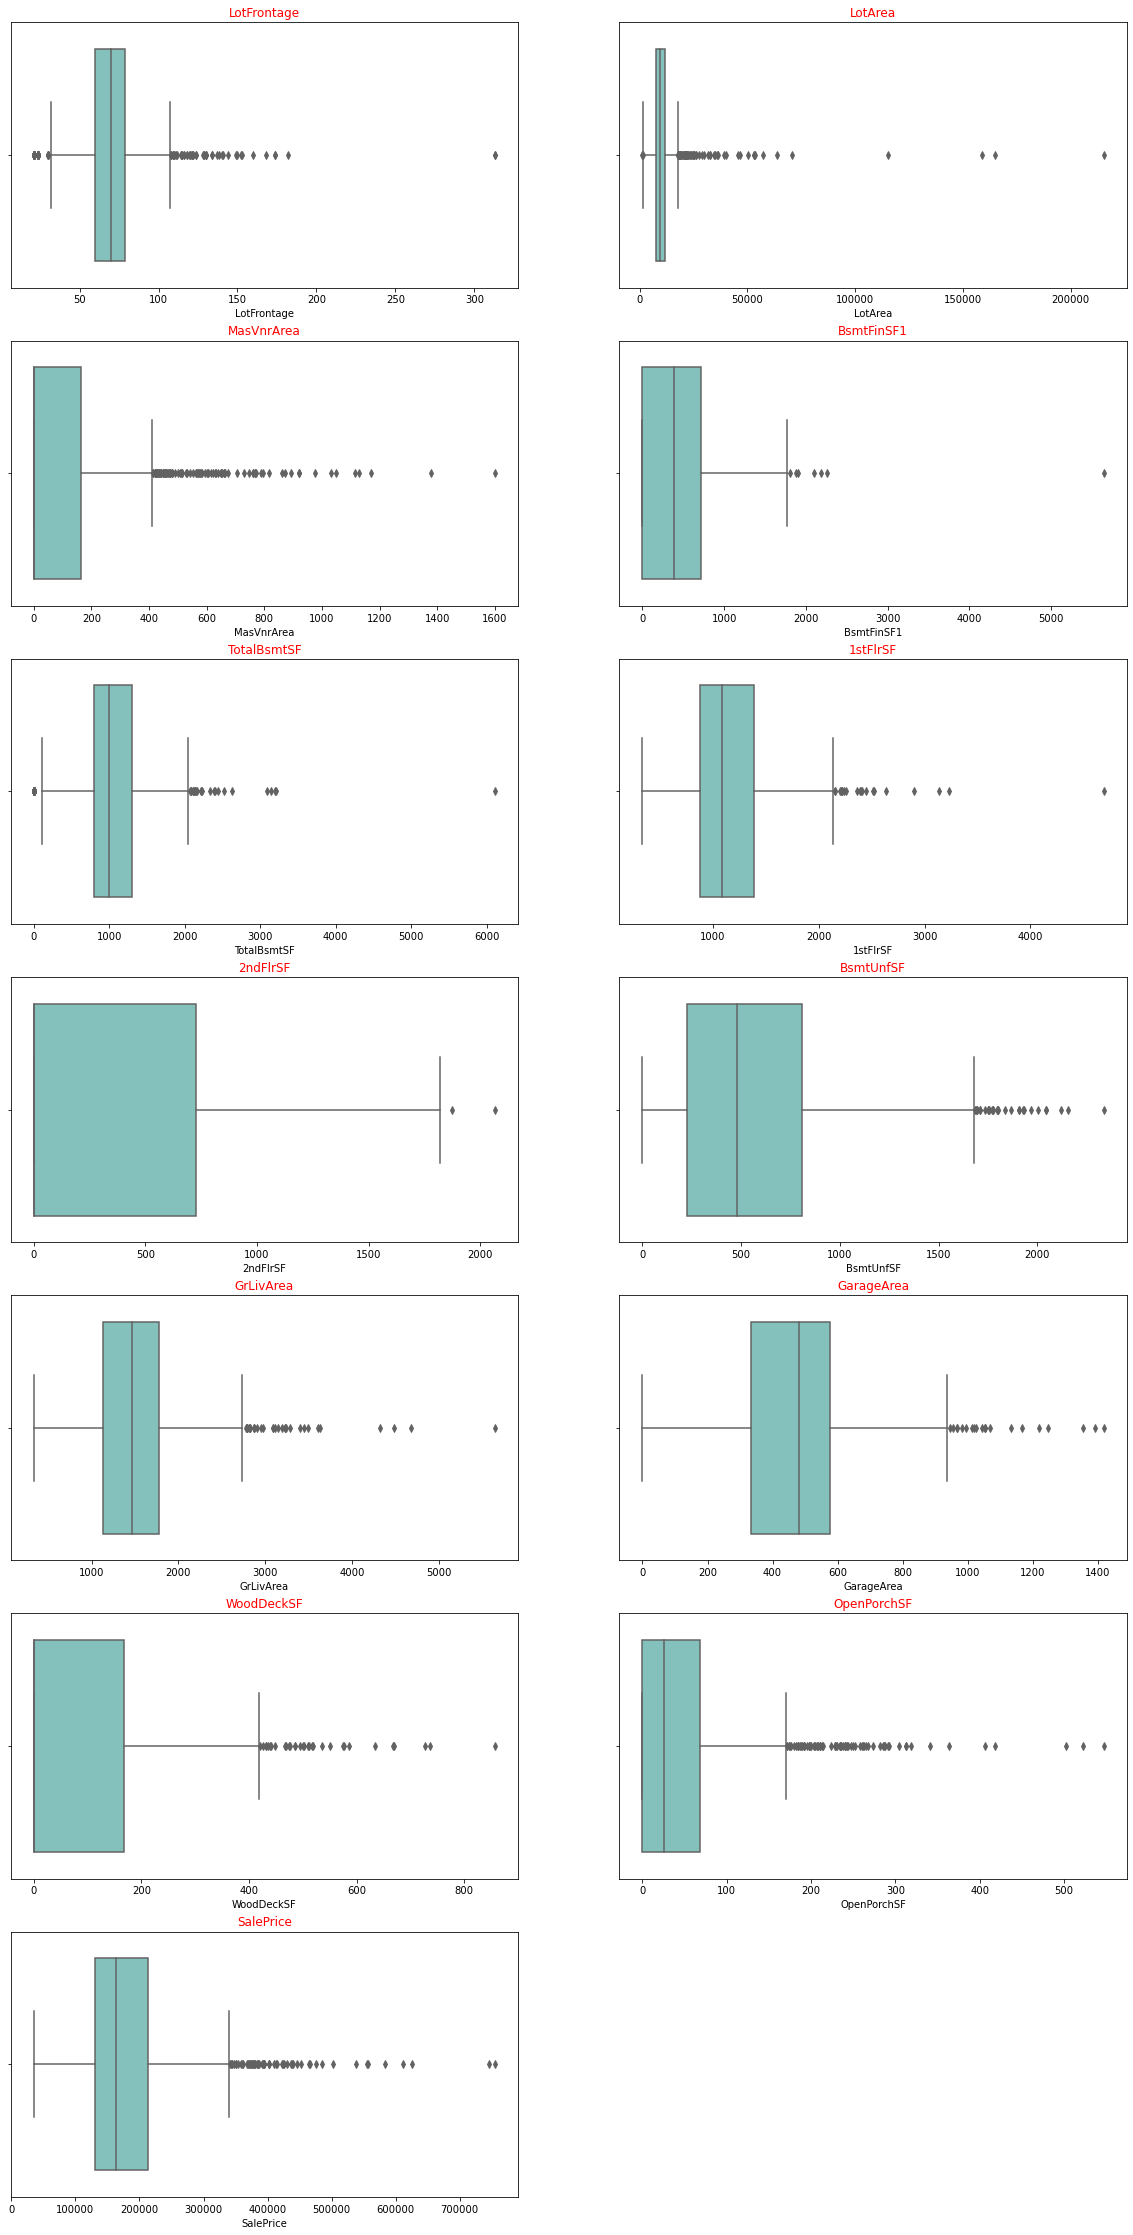

In [172]:
plt.figure(figsize=[20,40])
for i in enumerate(numerical_columns):
        plt.subplot(7,2,i[0]+1)
        sns.boxplot(data[i[1]],palette="GnBu")
        plt.title(i[1],color="r")
plt.show()

### Observations:
- There are features which are having Outliers.
- Would require Log transformation for Target variable that is SalePrice

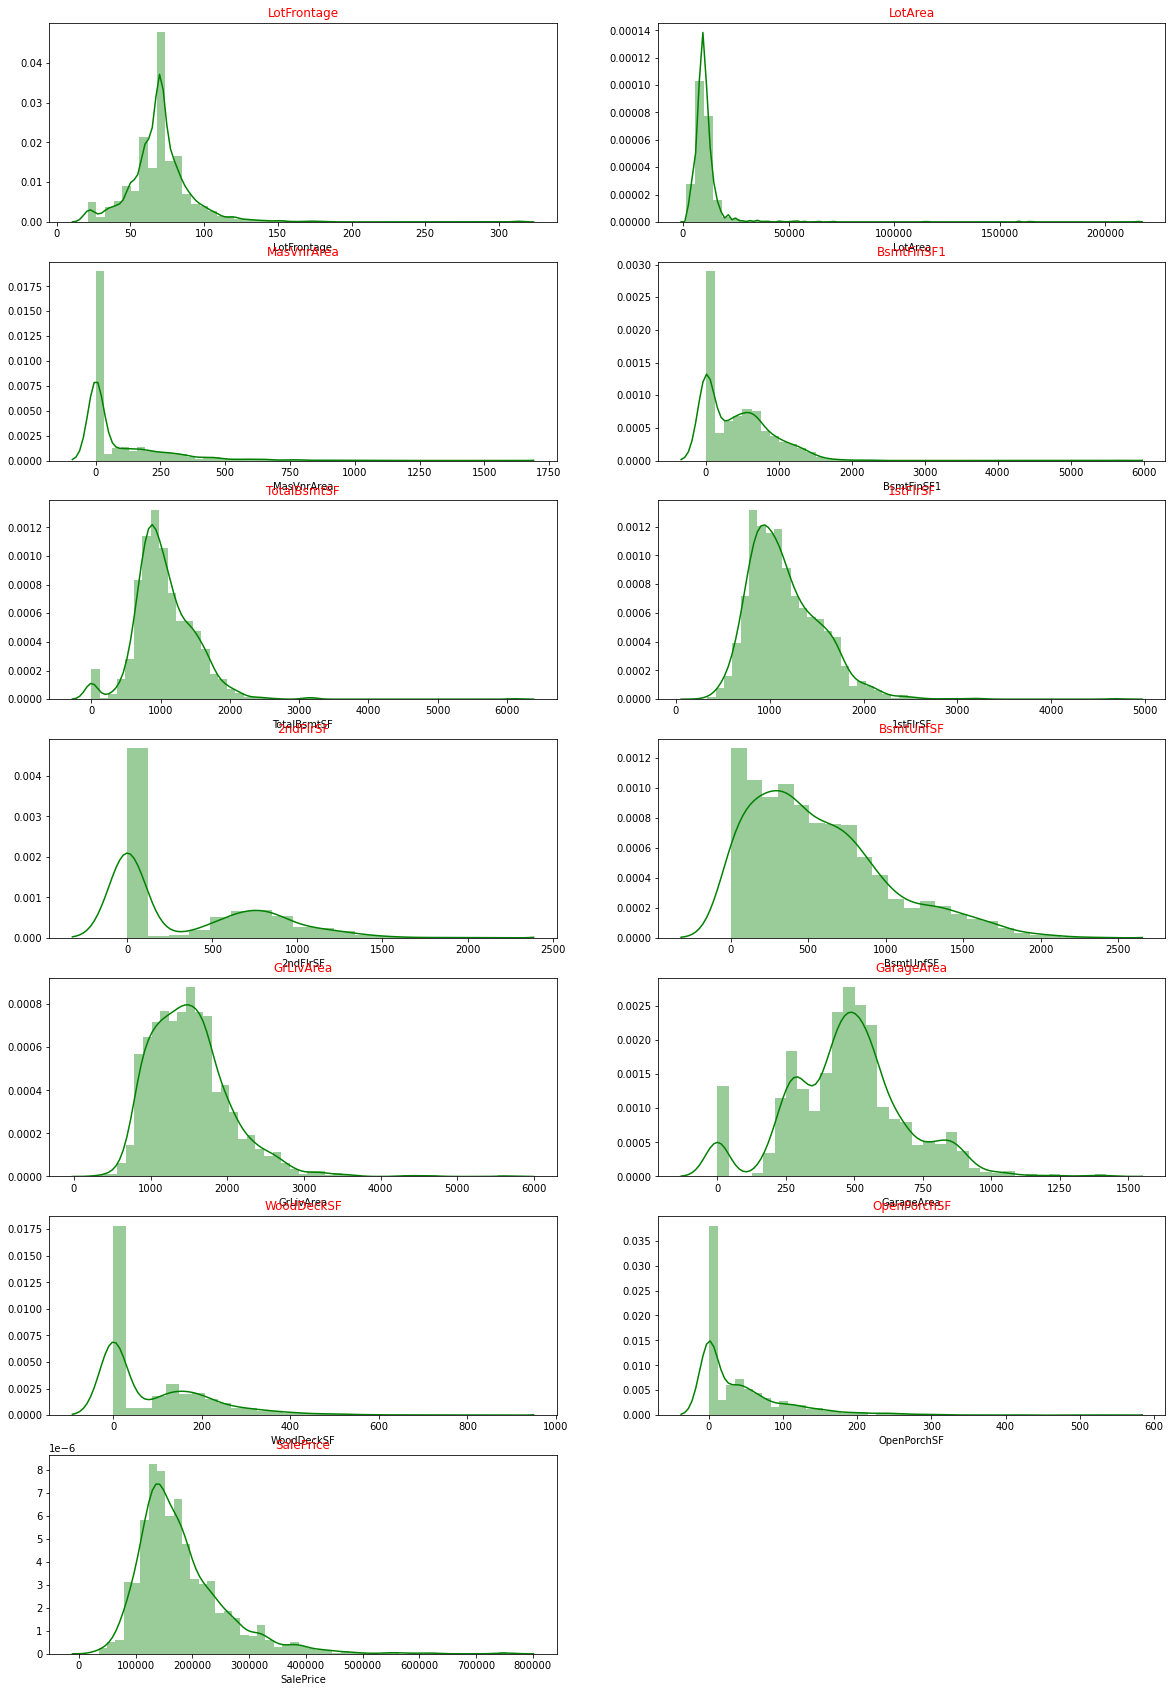

In [173]:
#DistPlot for each parameters
plt.figure(figsize=[20,30])
for i in enumerate(numerical_columns):
        plt.subplot(7,2,i[0]+1)
        sns.distplot(data[i[1]],color="g")
        plt.title(i[1],color="r")
plt.show()


### Observtions:
- It can be seen SalePrice is normally distributed ao overcome that it required log transformation

In [174]:
#Copying the data 
data1=data.copy()

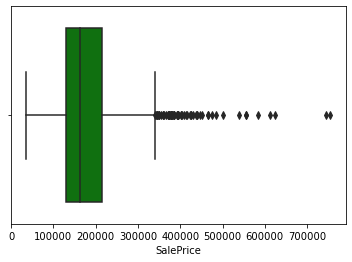

In [175]:
sns.boxplot(data1['SalePrice'],color="g")

In [176]:
data1['SalePrice']=np.log(data1['SalePrice'])

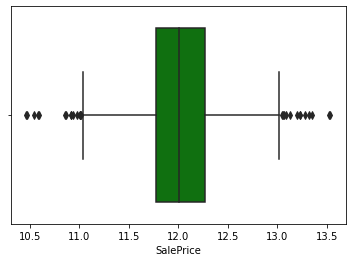

In [177]:
sns.boxplot(data1['SalePrice'],color="g")

In [178]:
data1['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

In [179]:
#Creating Dummy Variables for categories

In [180]:
for column in category_columns:
    print(column)
    print("*****************************************")
    print(round(data1[column].value_counts(normalize=True)*100,2))

MSSubClass
*****************************************
1StoryNew     36.71
Others        32.95
2StoryNew     20.48
1.5StoyFin     9.86
Name: MSSubClass, dtype: float64
MSZoning
*****************************************
RL        78.84
RM        14.93
Others     6.23
Name: MSZoning, dtype: float64
LotShape
*****************************************
Reg       63.36
IR1       33.15
Others     3.49
Name: LotShape, dtype: float64
LotConfig
*****************************************
Inside    72.05
Corner    18.01
Others     9.93
Name: LotConfig, dtype: float64
Neighborhood
*****************************************
Others     59.73
NAmes      15.41
CollgCr    10.27
OldTown     7.74
Edwards     6.85
Name: Neighborhood, dtype: float64
HouseStyle
*****************************************
1Story    49.73
2Story    30.48
1.5Fin    10.55
Others     9.25
Name: HouseStyle, dtype: float64
OverallQual
*****************************************
Average          27.19
Above Average    25.62
Good             

In [181]:
#Checking for null values  
for column in category_columns:
    print(column)
    print("*****************************************")
    print(data1[column].isnull().sum())

MSSubClass
*****************************************
0
MSZoning
*****************************************
0
LotShape
*****************************************
0
LotConfig
*****************************************
0
Neighborhood
*****************************************
0
HouseStyle
*****************************************
0
OverallQual
*****************************************
0
OverallCond
*****************************************
0
RoofStyle
*****************************************
0
Exterior1st
*****************************************
0
Exterior2nd
*****************************************
0
MasVnrType
*****************************************
0
ExterQual
*****************************************
0
Foundation
*****************************************
0
BsmtQual
*****************************************
0
BsmtExposure
*****************************************
0
BsmtFinType1
*****************************************
0
HeatingQC
*****************************************
0
BsmtFullBa

In [182]:
print(category_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'MoSold']


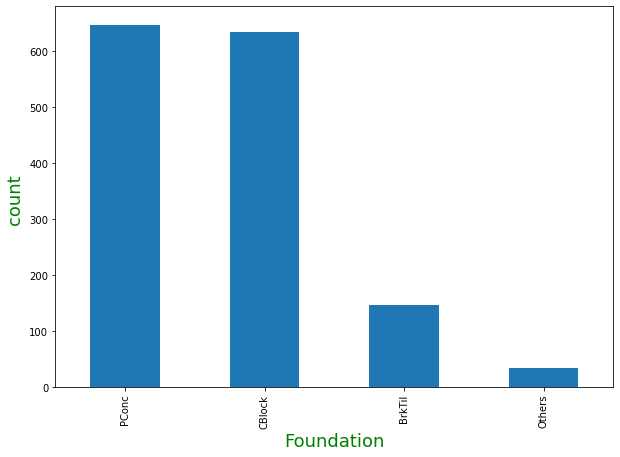

In [183]:
plt.figure(figsize=[10,7])   
data['Foundation'].value_counts().plot(kind='bar')
plt.xlabel('Foundation',fontsize=18,color='Green')
plt.ylabel('count ',fontsize=18,color='Green')
plt.show()

### Observation:
- It can be observed that if the Foundation of House is Poured COncrete , Then there is High chances of Getting House and culd be at good sale.

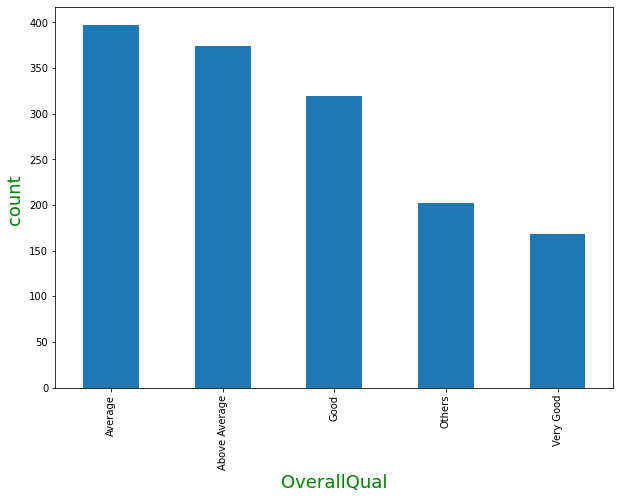

In [184]:
plt.figure(figsize=[10,7])   
data['OverallQual'].value_counts().plot(kind='bar')
plt.xlabel('OverallQual',fontsize=18,color='Green')
plt.ylabel('count ',fontsize=18,color='Green')
plt.show()

### Observations:
- There are houses which are more than Average on overall Quality finishing of home are more which has been saled.

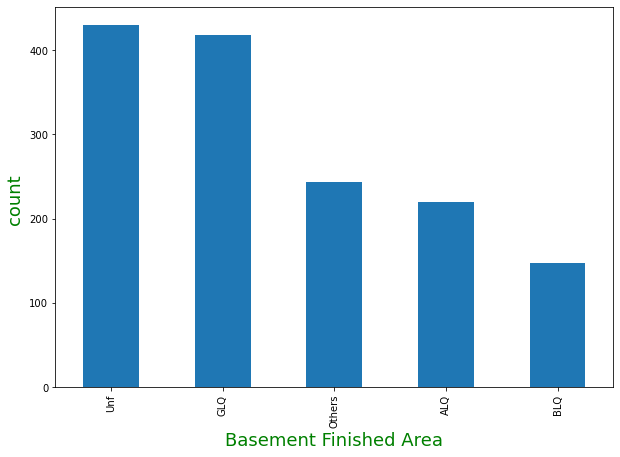

In [185]:
plt.figure(figsize=[10,7])   
data['BsmtFinType1'].value_counts().plot(kind='bar')
plt.xlabel('Basement Finished Area',fontsize=18,color='Green')
plt.ylabel('count ',fontsize=18,color='Green')
plt.show()

### Observations:
- It can b observed that  Good Living Qaters and which are not yet finished which could be on construction are more on sale.

In [186]:
data.shape

(1460, 46)

In [187]:
#Creating Dummy Variables for MSSubClass
ms=pd.get_dummies(data1['MSSubClass'],prefix='ms')
#dropping the prefix_ms_Others Origin
ms1=ms.drop('ms_Others',axis=1)
# Concating result to data1 data frame 
data1=pd.concat([data1,ms1],1)

In [188]:
#Creating Dummy Variables for MSZoning
mz=pd.get_dummies(data1['MSZoning'],prefix='mz')
#dropping the prefix_mz_Others Origin
mz1=mz.drop('mz_Others',axis=1)
# Concating result to data1 data frame 
data1=pd.concat([data1,mz1],1)

In [189]:
#Creating Dummy Variables for LotShape
ls=pd.get_dummies(data1['LotShape'],prefix='ls')
#dropping the prefix_ls_Others Origin
ls1=ls.drop('ls_Others',axis=1)
# Concating result to data1 data frame 
data1=pd.concat([data1,ls1],1)

In [190]:
#Creating Dummy Variables for LotConfig
lc=pd.get_dummies(data1['LotConfig'],prefix='lc')
#dropping the prefix_lc_Others Origin
lc1=lc.drop('lc_Others',axis=1)
# Concating result to data1 data frame 
data1=pd.concat([data1,lc1],1)

In [191]:
#Creating Dummy Variables for Neighborhood
nh=pd.get_dummies(data1['Neighborhood'],prefix='nh')
#dropping the prefix_nh_Others Origin
nh1=nh.drop('nh_Others',axis=1)
# Concating result to data1 data frame 
data1=pd.concat([data1,nh1],1)

In [192]:
#Creating Dummy Variables for HouseStyle
hs=pd.get_dummies(data1['HouseStyle'],prefix='hs')
#dropping the prefix_hs_Others Origin
hs1=hs.drop('hs_Others',axis=1)
# Concating result to data1 data frame 
data1=pd.concat([data1,hs1],1)

In [193]:
#Creating Dummy Variables for OverallQual
oq=pd.get_dummies(data1['OverallQual'],prefix='oq')
#dropping the prefix_oq_Others Origin
oq1=oq.drop('oq_Others',axis=1)
# Concating result to data1 data frame 
data1=pd.concat([data1,oq1],1)

In [194]:
#Creating Dummy Variables for OverallCond
oc=pd.get_dummies(data1['OverallCond'],prefix='oc')
#dropping the prefix_oc_Others Origin
oc1=oc.drop('oc_Others',axis=1)
# Concating result to data1 data frame 
data1=pd.concat([data1,oc1],1)

In [195]:
#Creating Dummy Variables for RoofStyle
rs=pd.get_dummies(data1['RoofStyle'],prefix='rs')
#dropping the prefix_rs_Others Origin
rs1=rs.drop('rs_Others',axis=1)
# Concating result to data1 data frame 
data1=pd.concat([data1,rs1],1)

In [196]:
#Creating Dummy Variables for Exterior1st
ex1st=pd.get_dummies(data1['Exterior1st'],prefix='ex1st')
#dropping the prefix_ex1st_Others Origin
ex1=ex1st.drop('ex1st_Others',axis=1)
# Concating result to data1 data frame 
data1=pd.concat([data1,ex1],1)

In [197]:
#Creating Dummy Variables for Exterior2nd
ex2nd=pd.get_dummies(data1['Exterior2nd'],prefix='ex2nd')
#dropping the prefix_ex2nd_Others Origin
ex2=ex2nd.drop('ex2nd_Others',axis=1)
# Concating result to data1 data frame 
data1=pd.concat([data1,ex2],1)

In [198]:
#Creating Dummy Variables for MasVnrType
mv=pd.get_dummies(data1['MasVnrType'],prefix='mv')
#dropping the prefix_mv_Others Origin
mv1=mv.drop('mv_Others',axis=1)
# Concating result to data1 data frame 
data1=pd.concat([data1,mv1],1)

In [199]:
#Creating Dummy Variables for ExterQual
eq=pd.get_dummies(data1['ExterQual'],prefix='eq')
#dropping the prefix_eq_Others Origin
eq1=eq.drop('eq_Others',axis=1)
# Concating result to data1 data frame 
data1=pd.concat([data1,eq1],1)

In [200]:
#Creating Dummy Variables for Foundation
fd=pd.get_dummies(data1['Foundation'],prefix='fd')
#dropping the prefix_fd_Others Origin
fd1=fd.drop('fd_Others',axis=1)
# Concating result to data1 data frame 
data1=pd.concat([data1,fd1],1)

In [201]:
#Creating Dummy Variables for BsmtQual
bq=pd.get_dummies(data1['BsmtQual'],prefix='bq')
#dropping the prefix_bq_Others Origin
bq1=bq.drop('bq_Others',axis=1)
# Concating result to data1 data frame 
data1=pd.concat([data1,bq1],1)

In [202]:
#Creating Dummy Variables for BsmtExposure
be=pd.get_dummies(data1['BsmtExposure'],prefix='be')
#dropping the prefix_be_Others Origin
be1=be.drop('be_Others',axis=1)
# Concating result to data1 data frame 
data1=pd.concat([data1,be1],1)

In [203]:
#Creating Dummy Variables for BsmtFinType1
bf=pd.get_dummies(data1['BsmtFinType1'],prefix='bf')
#dropping the prefix_bf_Others Origin
bf1=bf.drop('bf_Others',axis=1)
# Concating result to data1 data frame 
data1=pd.concat([data1,bf1],1)

In [204]:
#Creating Dummy Variables for HeatingQC
hq=pd.get_dummies(data1['HeatingQC'],prefix='hq')
#dropping the prefix_hq_Others Origin
hq1=hq.drop('hq_Others',axis=1)
# Concating result to data1 data frame 
data1=pd.concat([data1,hq1],1)

In [205]:
#Creating Dummy Variables for BsmtFullBath
bfb=pd.get_dummies(data1['BsmtFullBath'],prefix='bfb')
#dropping the prefix_bfb_Others Origin
bfb1=bfb.drop('bfb_Others',axis=1)
# Concating result to data1 data frame 
data1=pd.concat([data1,bfb1],1)

In [206]:
#Creating Dummy Variables for FullBath
fb=pd.get_dummies(data1['FullBath'],prefix='fb')
#dropping the prefix_fb_Others Origin
fb1=fb.drop('fb_Others',axis=1)
# Concating result to data1 data frame 
data1=pd.concat([data1,fb1],1)

In [207]:
#Creating Dummy Variables for HalfBath
hb=pd.get_dummies(data1['HalfBath'],prefix='hb')
#dropping the prefix_hb_Zero Origin
hb1=hb.drop('hb_Zero',axis=1)
# Concating result to data1 data frame 
data1=pd.concat([data1,hb1],1)

In [208]:
#Creating Dummy Variables for KitchenQual
kq=pd.get_dummies(data1['KitchenQual'],prefix='kq')
#dropping the prefix_kq_Others Origin
kq1=kq.drop('kq_Others',axis=1)
# Concating result to data1 data frame 
data1=pd.concat([data1,kq1],1)

In [209]:
#Creating Dummy Variables for Fireplaces
fp=pd.get_dummies(data1['Fireplaces'],prefix='fp')
#dropping the prefix_fp_Others Origin
fp1=fp.drop('fp_Others',axis=1)
# Concating result to data1 data frame 
data1=pd.concat([data1,fp1],1)

In [210]:
#Creating Dummy Variables for GarageType
gt=pd.get_dummies(data1['GarageType'],prefix='gt')
#dropping the prefix_gt_Others Origin
gt1=gt.drop('gt_Others',axis=1)
# Concating result to data1 data frame 
data1=pd.concat([data1,gt1],1)

In [211]:
#Creating Dummy Variables for GarageFinish
gf=pd.get_dummies(data1['GarageFinish'],prefix='gf')
#dropping the prefix_gf_Unf Origin
gf1=gf.drop('gf_Unf',axis=1)
# Concating result to data1 data frame 
data1=pd.concat([data1,gf1],1)

In [212]:
#Creating Dummy Variables for GarageCars
gc=pd.get_dummies(data1['GarageCars'],prefix='gc')
#dropping the prefix_gc_Others Origin
gc1=gc.drop('gc_Others',axis=1)
# Concating result to data1 data frame 
data1=pd.concat([data1,gc1],1)

In [213]:
#Creating Dummy Variables for MoSold
mos=pd.get_dummies(data1['MoSold'],prefix='mos')
#dropping the prefix_mos_Sep Origin
mos1=mos.drop('mos_Sep',axis=1)
# Concating result to data1 data frame 
data1=pd.concat([data1,mos1],1)

In [214]:
data1.shape

(1460, 124)

In [215]:
#Dropping origin columns
for column in category_columns:
    data1=data1.drop(column,axis=1)

In [216]:
data1.shape

(1460, 97)

## Imputing age of House

In [217]:
current_year=2020

In [218]:
current_year-data1['YearBuilt'][0]

17

In [219]:
data1['Age']=current_year-data1['YearBuilt']

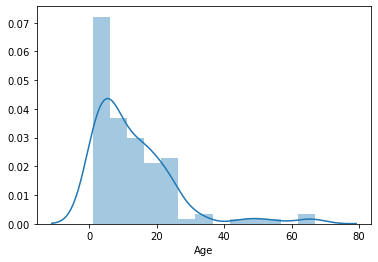

In [220]:
sns.distplot(data1['Age'].value_counts())

### Observations:
- It can be observed that most of the house ishas constructed for around 5-10years.

In [221]:
date_columns

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [222]:
#Removing other year of columns
data1.drop(['YearBuilt','YearRemodAdd', 'GarageYrBlt', 'YrSold'],axis=1,inplace=True)

In [223]:
data1.shape

(1460, 94)

In [224]:
data1.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,3SsnPorch,SalePrice,ms_1.5StoyFin,ms_1StoryNew,ms_2StoryNew,mz_RL,mz_RM,ls_IR1,ls_Reg,lc_Corner,lc_Inside,nh_CollgCr,nh_Edwards,nh_NAmes,nh_OldTown,hs_1.5Fin,hs_1Story,hs_2Story,oq_Above Average,oq_Average,oq_Good,oq_Very Good,oc_Above Average,oc_Average,oc_Good,rs_Gable,rs_Hip,ex1st_HdBoard,ex1st_MetalSd,ex1st_VinylSd,ex1st_Wd Sdng,ex2nd_HdBoard,ex2nd_MetalSd,ex2nd_VinylSd,ex2nd_Wd Sdng,mv_BrkFace,mv_None,eq_Gd,eq_TA,fd_BrkTil,fd_CBlock,fd_PConc,bq_Gd,bq_TA,be_Av,be_No,bf_ALQ,bf_BLQ,bf_GLQ,bf_Unf,hq_Ex,hq_TA,bfb_One,bfb_Zero,fb_One,fb_Two,hb_One,hb_Two,kq_Gd,kq_TA,fp_One,fp_Zero,gt_Attchd,gt_Detchd,gf_Fin,gf_No Garage,gf_RFn,gc_One,gc_Two,mos_Apr,mos_Aug,mos_Dec,mos_Feb,mos_Jan,mos_Jul,mos_Jun,mos_Mar,mos_May,mos_Nov,mos_Oct,Age
0,1,65.0,8450,196.0,706,150,856,856,854,1710,548,0,61,0,12.247694,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,17
1,2,80.0,9600,0.0,978,284,1262,1262,0,1262,460,298,0,0,12.109011,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,44
2,3,68.0,11250,162.0,486,434,920,920,866,1786,608,0,42,0,12.317167,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,19
3,4,60.0,9550,0.0,216,540,756,961,756,1717,642,0,35,0,11.849398,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,105
4,5,84.0,14260,350.0,655,490,1145,1145,1053,2198,836,192,84,0,12.429216,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,20


## Data Preparation

## Test-Train Split

## Putting Features variable to X

In [225]:
data1.columns

Index(['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'SalePrice', 'ms_1.5StoyFin',
       'ms_1StoryNew', 'ms_2StoryNew', 'mz_RL', 'mz_RM', 'ls_IR1', 'ls_Reg',
       'lc_Corner', 'lc_Inside', 'nh_CollgCr', 'nh_Edwards', 'nh_NAmes',
       'nh_OldTown', 'hs_1.5Fin', 'hs_1Story', 'hs_2Story', 'oq_Above Average',
       'oq_Average', 'oq_Good', 'oq_Very Good', 'oc_Above Average',
       'oc_Average', 'oc_Good', 'rs_Gable', 'rs_Hip', 'ex1st_HdBoard',
       'ex1st_MetalSd', 'ex1st_VinylSd', 'ex1st_Wd Sdng', 'ex2nd_HdBoard',
       'ex2nd_MetalSd', 'ex2nd_VinylSd', 'ex2nd_Wd Sdng', 'mv_BrkFace',
       'mv_None', 'eq_Gd', 'eq_TA', 'fd_BrkTil', 'fd_CBlock', 'fd_PConc',
       'bq_Gd', 'bq_TA', 'be_Av', 'be_No', 'bf_ALQ', 'bf_BLQ', 'bf_GLQ',
       'bf_Unf', 'hq_Ex', 'hq_TA', 'bfb_One', 'bfb_Zero', 'fb_One', 'fb_Two',
       'hb_One', 'hb_Two', 

In [226]:
#Independent variable is into X Data Frame
X=data1.drop(['SalePrice'],axis=1)

In [227]:
X.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,3SsnPorch,ms_1.5StoyFin,ms_1StoryNew,ms_2StoryNew,mz_RL,mz_RM,ls_IR1,ls_Reg,lc_Corner,lc_Inside,nh_CollgCr,nh_Edwards,nh_NAmes,nh_OldTown,hs_1.5Fin,hs_1Story,hs_2Story,oq_Above Average,oq_Average,oq_Good,oq_Very Good,oc_Above Average,oc_Average,oc_Good,rs_Gable,rs_Hip,ex1st_HdBoard,ex1st_MetalSd,ex1st_VinylSd,ex1st_Wd Sdng,ex2nd_HdBoard,ex2nd_MetalSd,ex2nd_VinylSd,ex2nd_Wd Sdng,mv_BrkFace,mv_None,eq_Gd,eq_TA,fd_BrkTil,fd_CBlock,fd_PConc,bq_Gd,bq_TA,be_Av,be_No,bf_ALQ,bf_BLQ,bf_GLQ,bf_Unf,hq_Ex,hq_TA,bfb_One,bfb_Zero,fb_One,fb_Two,hb_One,hb_Two,kq_Gd,kq_TA,fp_One,fp_Zero,gt_Attchd,gt_Detchd,gf_Fin,gf_No Garage,gf_RFn,gc_One,gc_Two,mos_Apr,mos_Aug,mos_Dec,mos_Feb,mos_Jan,mos_Jul,mos_Jun,mos_Mar,mos_May,mos_Nov,mos_Oct,Age
0,1,65.0,8450,196.0,706,150,856,856,854,1710,548,0,61,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,17
1,2,80.0,9600,0.0,978,284,1262,1262,0,1262,460,298,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,44
2,3,68.0,11250,162.0,486,434,920,920,866,1786,608,0,42,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,19
3,4,60.0,9550,0.0,216,540,756,961,756,1717,642,0,35,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,105
4,5,84.0,14260,350.0,655,490,1145,1145,1053,2198,836,192,84,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,20


### Putting Target variable to y 

In [228]:
#Putting Traget Variable that is SalePrice to y DataFrame
y=data1['SalePrice']
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

## Splitting Data into train adn test set

In [229]:
#Splitting DataFrame  to Train and Test Set
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [230]:
X.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,3SsnPorch,ms_1.5StoyFin,ms_1StoryNew,ms_2StoryNew,mz_RL,mz_RM,ls_IR1,ls_Reg,lc_Corner,lc_Inside,nh_CollgCr,nh_Edwards,nh_NAmes,nh_OldTown,hs_1.5Fin,hs_1Story,hs_2Story,oq_Above Average,oq_Average,oq_Good,oq_Very Good,oc_Above Average,oc_Average,oc_Good,rs_Gable,rs_Hip,ex1st_HdBoard,ex1st_MetalSd,ex1st_VinylSd,ex1st_Wd Sdng,ex2nd_HdBoard,ex2nd_MetalSd,ex2nd_VinylSd,ex2nd_Wd Sdng,mv_BrkFace,mv_None,eq_Gd,eq_TA,fd_BrkTil,fd_CBlock,fd_PConc,bq_Gd,bq_TA,be_Av,be_No,bf_ALQ,bf_BLQ,bf_GLQ,bf_Unf,hq_Ex,hq_TA,bfb_One,bfb_Zero,fb_One,fb_Two,hb_One,hb_Two,kq_Gd,kq_TA,fp_One,fp_Zero,gt_Attchd,gt_Detchd,gf_Fin,gf_No Garage,gf_RFn,gc_One,gc_Two,mos_Apr,mos_Aug,mos_Dec,mos_Feb,mos_Jan,mos_Jul,mos_Jun,mos_Mar,mos_May,mos_Nov,mos_Oct,Age
0,1,65.0,8450,196.0,706,150,856,856,854,1710,548,0,61,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,17
1,2,80.0,9600,0.0,978,284,1262,1262,0,1262,460,298,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,44
2,3,68.0,11250,162.0,486,434,920,920,866,1786,608,0,42,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,19
3,4,60.0,9550,0.0,216,540,756,961,756,1717,642,0,35,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,105
4,5,84.0,14260,350.0,655,490,1145,1145,1053,2198,836,192,84,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,20


In [231]:
#Dropping the ID column
X_train.drop('Id',axis=1,inplace=True)

In [232]:
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,3SsnPorch,ms_1.5StoyFin,ms_1StoryNew,ms_2StoryNew,mz_RL,mz_RM,ls_IR1,ls_Reg,lc_Corner,lc_Inside,nh_CollgCr,nh_Edwards,nh_NAmes,nh_OldTown,hs_1.5Fin,hs_1Story,hs_2Story,oq_Above Average,oq_Average,oq_Good,oq_Very Good,oc_Above Average,oc_Average,oc_Good,rs_Gable,rs_Hip,ex1st_HdBoard,ex1st_MetalSd,ex1st_VinylSd,ex1st_Wd Sdng,ex2nd_HdBoard,ex2nd_MetalSd,ex2nd_VinylSd,ex2nd_Wd Sdng,mv_BrkFace,mv_None,eq_Gd,eq_TA,fd_BrkTil,fd_CBlock,fd_PConc,bq_Gd,bq_TA,be_Av,be_No,bf_ALQ,bf_BLQ,bf_GLQ,bf_Unf,hq_Ex,hq_TA,bfb_One,bfb_Zero,fb_One,fb_Two,hb_One,hb_Two,kq_Gd,kq_TA,fp_One,fp_Zero,gt_Attchd,gt_Detchd,gf_Fin,gf_No Garage,gf_RFn,gc_One,gc_Two,mos_Apr,mos_Aug,mos_Dec,mos_Feb,mos_Jan,mos_Jul,mos_Jun,mos_Mar,mos_May,mos_Nov,mos_Oct,Age
318,90.0,9900,256.0,987,360,1347,1372,1274,2646,656,340,60,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,27
239,52.0,8741,0.0,94,641,735,798,689,1487,220,0,140,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,75
986,59.0,5310,0.0,0,485,485,1001,634,1635,255,394,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,110
1416,60.0,11340,0.0,0,777,777,1246,1044,2290,560,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,135
390,50.0,8405,0.0,241,229,861,961,406,1367,384,0,130,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,120


In [233]:
from sklearn.preprocessing import StandardScaler

In [234]:
scaler=StandardScaler()

In [235]:
X_train[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GarageArea',
'WoodDeckSF','OpenPorchSF']]=scaler.fit_transform(X_train[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GarageArea',
'WoodDeckSF','OpenPorchSF']])

In [236]:
X_train.shape

(1021, 92)

In [237]:
#Creating Object for Linear Regresison Model
lm=LinearRegression()
# Using RFE selecting only 15 features
rfe=RFE(lm,30)
#Fiiting to X Train ser
rfe=rfe.fit(X_train,y_train)

In [238]:
# list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [239]:
#Taking the columns which are significant in col dataframe
col=X_train.columns[rfe.support_]
col

Index(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'ms_1StoryNew', 'mz_RL',
       'nh_Edwards', 'nh_OldTown', 'hs_1Story', 'oq_Good', 'oq_Very Good',
       'oc_Good', 'fd_BrkTil', 'fd_CBlock', 'fd_PConc', 'bq_Gd', 'bq_TA',
       'bf_ALQ', 'bf_GLQ', 'hq_Ex', 'fb_One', 'fb_Two', 'hb_Two', 'fp_One',
       'fp_Zero', 'gt_Attchd', 'gf_No Garage', 'gc_One', 'gc_Two', 'mos_Jan',
       'mos_Oct'],
      dtype='object')

## Ridge Regression

In [240]:
X_train1=X_train[col]

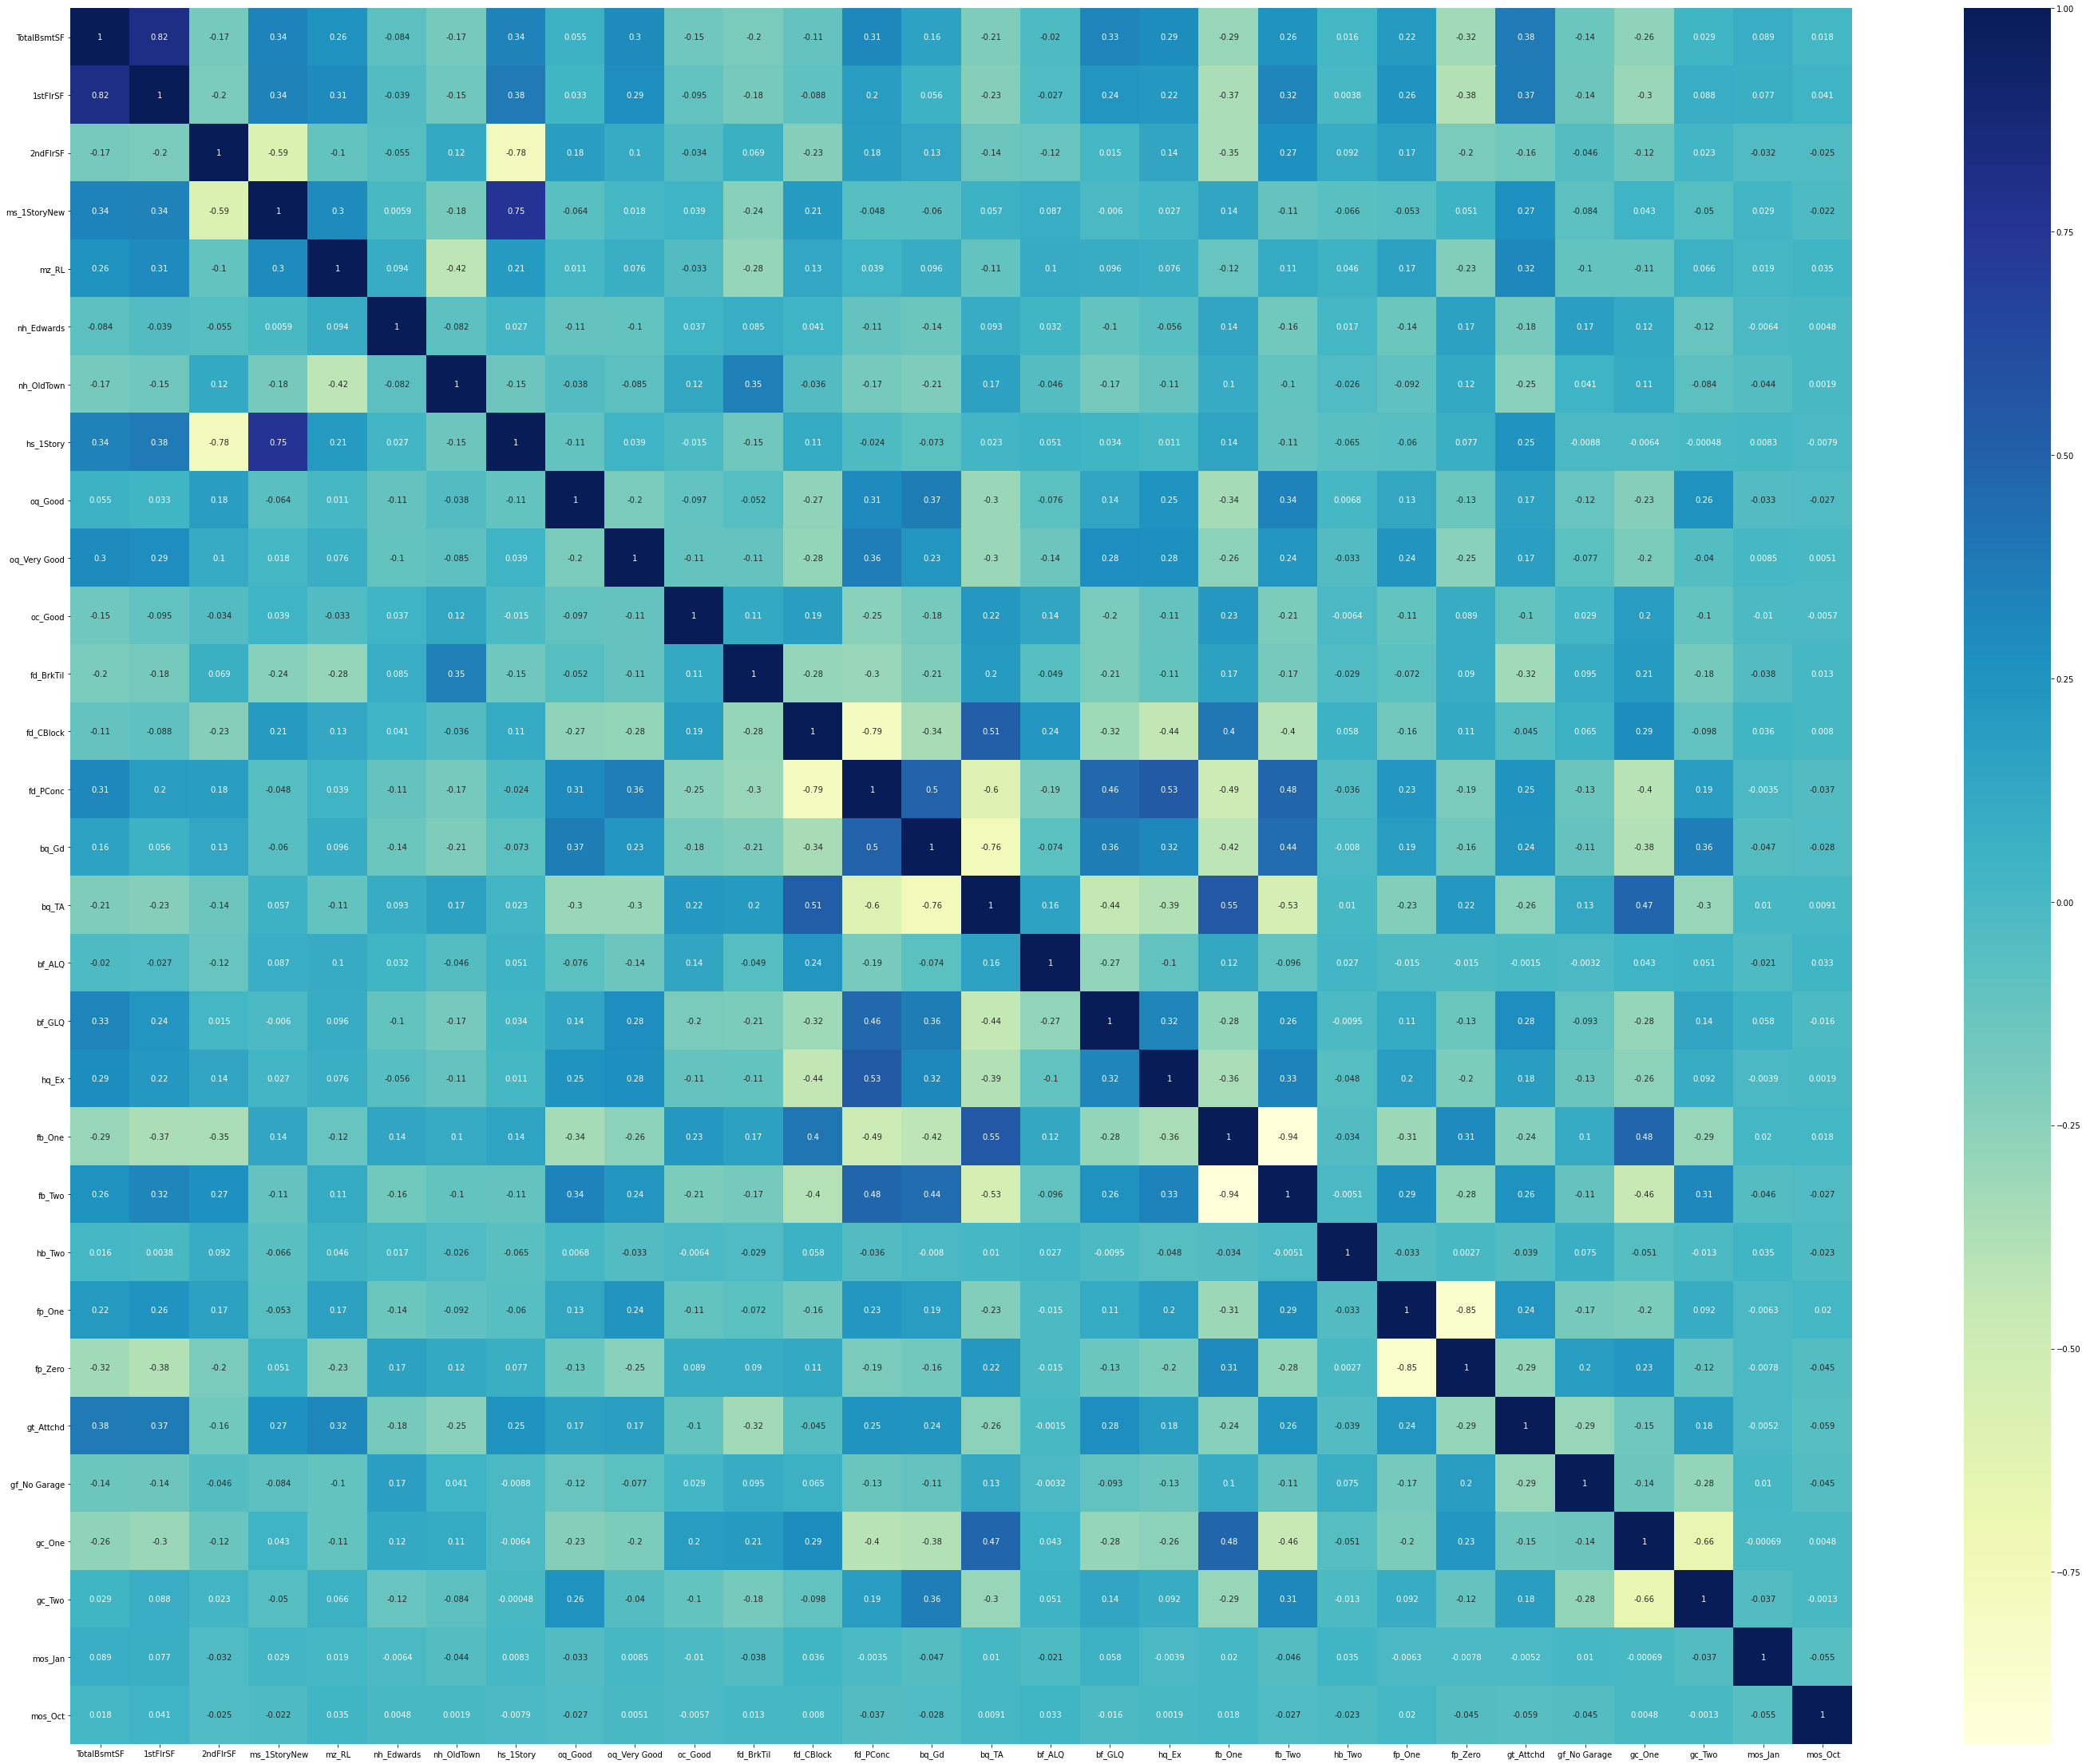

In [241]:
#Checking For Correlation Matrix
plt.figure(figsize=[50,40])
sns.heatmap(X_train1.corr(),cmap='YlGnBu',annot=True)

In [242]:
X_train1.corr()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,ms_1StoryNew,mz_RL,nh_Edwards,nh_OldTown,hs_1Story,oq_Good,oq_Very Good,oc_Good,fd_BrkTil,fd_CBlock,fd_PConc,bq_Gd,bq_TA,bf_ALQ,bf_GLQ,hq_Ex,fb_One,fb_Two,hb_Two,fp_One,fp_Zero,gt_Attchd,gf_No Garage,gc_One,gc_Two,mos_Jan,mos_Oct
TotalBsmtSF,1.000000,0.816260,-0.170703,0.337344,0.256719,-0.084309,-0.174701,0.344147,0.055304,0.299894,-0.146396,-0.195341,-0.109855,0.310816,0.161863,-0.213157,-0.019678,0.330110,0.292021,-0.294286,0.259524,0.015905,0.216716,-0.322349,0.383371,-0.136773,-0.262018,0.029162,0.089367,0.017716
1stFlrSF,0.816260,1.000000,-0.196261,0.343108,0.305110,-0.038942,-0.151443,0.378264,0.033270,0.285484,-0.094970,-0.176722,-0.088465,0.197150,0.056012,-0.232145,-0.027131,0.238888,0.221097,-0.365436,0.317217,0.003802,0.255285,-0.382798,0.370619,-0.141655,-0.303395,0.088045,0.077153,0.041396
2ndFlrSF,-0.170703,-0.196261,1.000000,-0.585757,-0.102780,-0.054598,0.116901,-0.775333,0.181112,0.099986,-0.033877,0.068694,-0.231049,0.182435,0.128338,-0.144034,-0.122105,0.014582,0.137483,-0.351397,0.270075,0.091990,0.169448,-0.198012,-0.155687,-0.045786,-0.123957,0.023312,-0.031651,-0.025156
ms_1StoryNew,0.337344,0.343108,-0.585757,1.000000,0.301057,0.005883,-0.178255,0.751896,-0.063962,0.018246,0.038780,-0.243575,0.206286,-0.047657,-0.059712,0.057445,0.086707,-0.005953,0.027191,0.141189,-0.112826,-0.066429,-0.053031,0.051313,0.270711,-0.083914,0.042801,-0.049829,0.028545,-0.021931
mz_RL,0.256719,0.305110,-0.102780,0.301057,1.000000,0.093649,-0.420225,0.208464,0.010583,0.076111,-0.033121,-0.283345,0.134745,0.038816,0.095768,-0.105916,0.099939,0.096034,0.075926,-0.116581,0.109121,0.046438,0.171576,-0.228335,0.315913,-0.101579,-0.106186,0.066079,0.019208,0.034839
nh_Edwards,-0.084309,-0.038942,-0.054598,0.005883,0.093649,1.000000,-0.082126,0.027114,-0.113789,-0.104956,0.036875,0.084938,0.040687,-0.107878,-0.135055,0.092812,0.031621,-0.103564,-0.056211,0.138477,-0.158447,0.017119,-0.136913,0.165408,-0.180624,0.174833,0.115400,-0.117866,-0.006356,0.004815
nh_OldTown,-0.174701,-0.151443,0.116901,-0.178255,-0.420225,-0.082126,1.000000,-0.145493,-0.037748,-0.084654,0.123776,0.353635,-0.036220,-0.174894,-0.208881,0.169937,-0.046351,-0.172990,-0.110693,0.104111,-0.101216,-0.025735,-0.092452,0.115152,-0.250242,0.041347,0.107089,-0.084077,-0.044324,0.001910
hs_1Story,0.344147,0.378264,-0.775333,0.751896,0.208464,0.027114,-0.145493,1.000000,-0.107369,0.039266,-0.014878,-0.147543,0.109435,-0.024222,-0.073203,0.022731,0.051375,0.034411,0.011453,0.143030,-0.111875,-0.065180,-0.060382,0.076916,0.250961,-0.008751,-0.006417,-0.000481,0.008348,-0.007943
oq_Good,0.055304,0.033270,0.181112,-0.063962,0.010583,-0.113789,-0.037748,-0.107369,1.000000,-0.195643,-0.096942,-0.051540,-0.266614,0.305250,0.367614,-0.304118,-0.076257,0.136649,0.251586,-0.336560,0.337449,0.006794,0.127072,-0.133355,0.166332,-0.118218,-0.230246,0.263705,-0.032667,-0.027192
oq_Very Good,0.299894,0.285484,0.099986,0.018246,0.076111,-0.104956,-0.084654,0.039266,-0.195643,1.000000,-0.113941,-0.110380,-0.278231,0.358737,0.234399,-0.299570,-0.143837,0.284368,0.277226,-0.256495,0.240791,-0.032889,0.244297,-0.250654,0.174190,-0.076888,-0.204315,-0.040132,0.008485,0.005132


### Observations: There are multiple columns which are correlated to each other
- Total basment is highly correlated with 1st floor Squar feet paramete. That means more the area of basement , more will be the area of 1st Floor
- HouseStyle 1 Story new is highy correlated to MSsubClass 1 Story New. . Hence The dwelling indicates the renovation and creating new House.

In [243]:
X_train1.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,ms_1StoryNew,mz_RL,nh_Edwards,nh_OldTown,hs_1Story,oq_Good,oq_Very Good,oc_Good,fd_BrkTil,fd_CBlock,fd_PConc,bq_Gd,bq_TA,bf_ALQ,bf_GLQ,hq_Ex,fb_One,fb_Two,hb_Two,fp_One,fp_Zero,gt_Attchd,gf_No Garage,gc_One,gc_Two,mos_Jan,mos_Oct
318,0.621091,0.511410,2.137583,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0
239,-0.712611,-0.931882,0.793638,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
986,-1.257424,-0.421449,0.667284,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0
1416,-0.621082,0.194590,1.609195,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
390,-0.438025,-0.522027,0.143490,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0


### Observations:
- Contains Importnat 30features using RFE

In [244]:
# list of alphas to tune
params = {'alpha': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,20.0,30,35,40,45 ,50,55,100,300 ,500,1000,10000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train1,y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20.0, 30, 35, 40, 45, 50, 55, 100, 300, 500,
                                   1000, 10000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [245]:
#Best Score 
model_cv.best_score_

-0.11507586188553556

In [246]:
#Best Value of Alpha
model_cv.best_params_

{'alpha': 7.0}

In [247]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004660,0.001316,0.002163,0.000303,0.2,{'alpha': 0.2},-0.110502,-0.122440,-0.120816,-0.111491,-0.116048,-0.116259,0.004794,19,-0.112984,-0.104920,-0.108205,-0.112318,-0.111201,-0.109926,0.002991
1,0.003120,0.000079,0.001859,0.000023,0.3,{'alpha': 0.3},-0.110446,-0.122444,-0.120702,-0.111324,-0.116105,-0.116204,0.004820,18,-0.112963,-0.104922,-0.108152,-0.112274,-0.111191,-0.109901,0.002984
2,0.004016,0.001626,0.002285,0.001021,0.4,{'alpha': 0.4},-0.110392,-0.122448,-0.120593,-0.111161,-0.116166,-0.116152,0.004847,17,-0.112942,-0.104926,-0.108104,-0.112233,-0.111181,-0.109877,0.002977
3,0.003925,0.000583,0.002396,0.000718,0.5,{'alpha': 0.5},-0.110338,-0.122451,-0.120487,-0.111002,-0.116224,-0.116100,0.004874,15,-0.112923,-0.104930,-0.108057,-0.112200,-0.111172,-0.109856,0.002971
4,0.003078,0.000458,0.001932,0.000472,0.6,{'alpha': 0.6},-0.110285,-0.122454,-0.120382,-0.110846,-0.116281,-0.116050,0.004902,14,-0.112911,-0.104933,-0.108012,-0.112169,-0.111163,-0.109838,0.002967


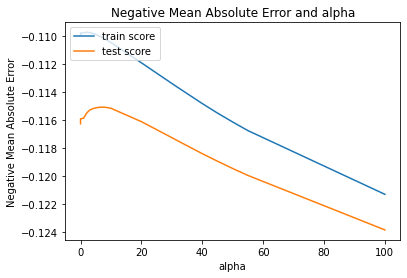

In [248]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Observations:
- It is observed that The optimal value for alpha is near to 10 after which there is no further increase , it is gradually decreasing. 
- For train set it is gradually decreasing and model has fitted well on it

In [249]:
#Coeff on lambda value 7 
alpha = 7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train1, y_train)
ridge.coef_

array([ 0.06486054,  0.08723888,  0.11446722,  0.08299819,  0.05844472,
       -0.13135983, -0.09441584, -0.04981695,  0.07366464,  0.12970427,
        0.0752793 ,  0.01346043,  0.03788194,  0.09903239, -0.06822837,
       -0.09675443,  0.06019547,  0.10945001,  0.07717236, -0.0688525 ,
       -0.06380267, -0.0697363 , -0.03145481, -0.12895356,  0.05787462,
       -0.22647077, -0.15521528, -0.09332327, -0.06510991, -0.05001576])

### Observations:
- On Alpha value=7 The coefficients for 30 features has been produced

## LASSO Regression

In [250]:
params = {'alpha': [1e-15,1e-10,1e-8,1e-6,1e-5,1e-4,1e-3,1e-2]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train1, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-06, 1e-05, 0.0001,
                                   0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [251]:
#Best Alpha value
model_cv.best_params_

{'alpha': 0.001}

In [252]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015104,0.001362,0.002096,0.000175,1e-15,{'alpha': 1e-15},-0.110615,-0.122432,-0.121091,-0.111838,-0.115936,-0.116382,0.004751,7,-0.113037,-0.104917,-0.108328,-0.112412,-0.111221,-0.109983,0.003005
1,0.006613,0.000310,0.001320,0.000042,1e-10,{'alpha': 1e-10},-0.110615,-0.122432,-0.121091,-0.111838,-0.115936,-0.116382,0.004751,6,-0.113037,-0.104917,-0.108328,-0.112412,-0.111221,-0.109983,0.003005
2,0.005104,0.000285,0.001240,0.000009,1e-08,{'alpha': 1e-08},-0.110615,-0.122432,-0.121091,-0.111838,-0.115936,-0.116382,0.004751,5,-0.113037,-0.104917,-0.108328,-0.112412,-0.111221,-0.109983,0.003005
3,0.004416,0.000433,0.001402,0.000133,1e-06,{'alpha': 1e-06},-0.110612,-0.122433,-0.121086,-0.111828,-0.115942,-0.116380,0.004753,4,-0.113034,-0.104917,-0.108325,-0.112409,-0.111220,-0.109981,0.003005
4,0.005088,0.001391,0.001711,0.000386,1e-05,{'alpha': 1e-05},-0.110582,-0.122443,-0.121041,-0.111739,-0.115998,-0.116361,0.004770,3,-0.113014,-0.104914,-0.108295,-0.112384,-0.111212,-0.109964,0.003000


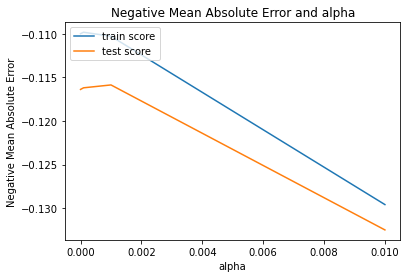

In [253]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Observatons:
- It can be observed that , the optimal valeue for alpha is near to 0.001, after which there is gradually decrease
- For Train set , it is gradually decreasing and model is fitted well.

In [254]:
#COeff for Alpha value 0.001
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train1, y_train)
lasso.coef_

array([ 0.06439331,  0.0892626 ,  0.12026895,  0.07561438,  0.05517433,
       -0.1262237 , -0.09243248, -0.03310435,  0.06726065,  0.12292511,
        0.07102236, -0.        ,  0.01524575,  0.0759266 , -0.05320046,
       -0.08330523,  0.05506711,  0.10992927,  0.0766482 , -0.01705525,
       -0.01488096, -0.        , -0.0175486 , -0.11734945,  0.05623038,
       -0.25052669, -0.16629038, -0.1008444 , -0.04678674, -0.03719188])

## Ridge Score 

In [255]:
X_test[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GarageArea',
'WoodDeckSF','OpenPorchSF']]=scaler.transform(X_test[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GarageArea',
'WoodDeckSF','OpenPorchSF']])

In [256]:
X_test1=X_test[col]

In [257]:
#Ridge Score on train set
round(ridge.score(X_train1,y_train),4)

0.8337

In [258]:
#Ridge score on Test set 
round(ridge.score(X_test1,y_test),4)

0.7974

## Lasso Score

In [259]:
# Lasso score on train set
round(lasso.score(X_train1,y_train),4)

0.8311

In [260]:
# Lasso Score on test set 
round(lasso.score(X_test1,y_test),4)

0.7985

## Evaluating Features

In [261]:
#RIDGE
# Evaluating the Coeff. 
# Converting the coeff inot list and then into Dataframe
ridge_coef=ridge.coef_.tolist()
ridge_coef=pd.Series(ridge_coef)

ridge_coef=pd.DataFrame(ridge_coef)
ridge_coef.columns=['R_Coeffcients']


In [262]:
#LASSO
# Evaluating the Coeff. 
# Converting the coeff inot list and then into Dataframe
lasso_coef=lasso.coef_.tolist()
lasso_coef=pd.Series(lasso_coef)

lasso_coef=pd.DataFrame(lasso_coef)
lasso_coef.columns=['L_Coeffcients']

In [263]:
# Feature into DataFrame
Features=pd.Series(col)

Features=pd.DataFrame(Features)

Features.columns=['Features']

In [264]:
#Concatinating the Lasso Coeff and Features
Lasso_Features=pd.concat([Features,lasso_coef],axis=1)

In [265]:
#Concatinating the RidgeCoeff and Features
Ridge_Features=pd.concat([Features,ridge_coef],axis=1)

In [266]:
# Top 5 Features for Ridge Regression
Ridge_Features.sort_values(by=['R_Coeffcients'],ascending=False).head()

,Features,R_Coeffcients
9,oq_Very Good,0.129704
2,2ndFlrSF,0.114467
17,bf_GLQ,0.109450
13,fd_PConc,0.099032
1,1stFlrSF,0.087239


In [267]:
#Top 5 Features for Lasso Regression
Lasso_Features.sort_values(by=['L_Coeffcients'],ascending=False).head()

,Features,L_Coeffcients
9,oq_Very Good,0.122925
2,2ndFlrSF,0.120269
17,bf_GLQ,0.109929
1,1stFlrSF,0.089263
18,hq_Ex,0.076648


In [268]:
#RIDGE
#R2_Score for Train set
ridge_train_predicted=ridge.predict(X_train1)
round(r2_score(y_train,ridge_train_predicted),4)

0.8337

In [269]:
#RIDGE
#R2_Score for test set
ridge_predicted=ridge.predict(X_test1)
round(r2_score(y_test,ridge_predicted),4)

0.7974

In [270]:
#LASSO
#R2_Score for Train Set
lasso_train_predicted=lasso.predict(X_train1)
round(r2_score(y_train,lasso_train_predicted),4)

0.8311

In [271]:
#LASSO
#R2_score for Test Set
lasso_predicted=lasso.predict(X_test1)
round(r2_score(y_test,lasso_predicted),4)

0.7985

### Problem Statement :
<font color='Blue'>
- US Based Housing Company name Surprise Company are looking for prospective prperties to enter into market. <br>
    They would like to know The Feature to look into in predicting the price of House and how well the price of those explain the House.<br>
   
<font color='Black'>
Solution:<br>
    
<font color='Green'>
- As per the model the best predictive variable which predict the House Price are :<br>

    -- Rates given to material and finished Home .<br>
    This Variable tells the overall quality of Houe with respect to material as well as Finishing of it.
    -- 2ndFlrSF as well as 1stFlrSF<br>
    These tels the about the Square feet of 1st and 2nd Florr. It can help in predicting the price of House.
    The more, The more will be demand 
    -- BsmtFinType2<br>
    This Feature will tell the Rating of the  basement finished area. ANd basically it is of Good Living Quaters
    --  Pconc<br>
    This Feature is useful which tells the foundation of House , should be on Poured COncrete
    -- HeatingQC<br>
    This feature Tells Rate given for Heating Quality. This is useful in predicting price of House